In [ ]:
'''
 * Copyright (c) 2016 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

Let us introduce this more formally.

### Definition 3.9 (Orthonormal Basis)

Consider an $ n $-dimensional vector space $ V $ and a basis $ \{b_1, \ldots, b_n\} $ of $ V $. If

$$
\langle b_i, b_j \rangle = 0 \quad \text{for} \ i \neq j \tag{3.33}
$$

$$
\langle b_i, b_i \rangle = 1 \tag{3.34}
$$

for all $ i, j = 1, \ldots, n $ then the basis is called an **orthonormal basis (ONB)**. If only (3.33) is satisfied, then the basis is called an **orthogonal basis**. Note that (3.34) implies that every basis vector has length/norm 1.

Recall from Section 2.6.1 that we can use Gaussian elimination to find a basis for a vector space spanned by a set of vectors. Assume we are given a set $ \{\tilde{b}_1, \ldots, \tilde{b}_n\} $ of non-orthogonal and unnormalized basis vectors. We concatenate them into a matrix $ \tilde{B} = [\tilde{b}_1, \ldots, \tilde{b}_n] $ and apply Gaussian elimination to the augmented matrix (Section 2.3.2) $ [\tilde{B}^\top \tilde{B} | \tilde{B}] $ to obtain an orthonormal basis. This constructive way to iteratively build an orthonormal basis $ \{b_1, \ldots, b_n\} $ is called the **Gram-Schmidt process** (Strang, 2003).

### Example 3.8 (Orthonormal Basis)

The canonical/standard basis for a Euclidean vector space $ \mathbb{R}^n $ is an orthonormal basis, where the inner product is the dot product of vectors. In $ \mathbb{R}^2 $, the vectors

$$
b_1 = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}, \quad b_2 = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix} \tag{3.35}
$$

form an orthonormal basis since $ b_1^\top b_2 = 0 $ and $ \|b_1\| = 1 = \|b_2\| $.

We will exploit the concept of an orthonormal basis in Chapter 12 and Chapter 10 when we discuss support vector machines and principal component analysis.

## 3.6 Orthogonal Complement

Having defined orthogonality, we will now look at vector spaces that are orthogonal to each other. This will play an important role in Chapter 10, when we discuss linear dimensionality reduction from a geometric perspective.

Consider a $ D $-dimensional vector space $ V $ and an $ M $-dimensional subspace $ U \subseteq V $. Then its **orthogonal complement** $ U^\perp $ is a $ (D - M) $-dimensional subspace of $ V $ and contains all vectors in $ V $ that are orthogonal to every vector in $ U $. Furthermore, $ U \cap U^\perp = \{0\} $ so that any vector $ x \in V $ can be

In [1]:
import math

# --- Dot Product (Standard Inner Product) ---
def dot_product(x, y):
    """
    Compute the dot product of two vectors: x^T y = sum(x_i * y_i)
    """
    return sum(xi * yi for xi, yi in zip(x, y))

# --- Norm Induced by Dot Product ---
def norm(x):
    """
    Compute the Euclidean norm of a vector: ||x|| = sqrt(x^T x)
    """
    return math.sqrt(dot_product(x, x))

# --- Check if Vectors Form an Orthonormal Basis (Definition 3.9) ---
def is_orthonormal_basis(basis_vectors):
    """
    Check if a set of vectors forms an orthonormal basis:
    - Orthogonal: <b_i, b_j> = 0 for i != j (Equation 3.33)
    - Unit norm: <b_i, b_i> = 1 (Equation 3.34)
    """
    n = len(basis_vectors)
    
    # Check unit norms
    for i in range(n):
        norm_bi = norm(basis_vectors[i])
        if abs(norm_bi - 1.0) > 1e-10:
            print(f"Vector {basis_vectors[i]} has norm {norm_bi:.2f}, not 1")
            return False
    
    # Check orthogonality
    for i in range(n):
        for j in range(i + 1, n):
            inner_prod = dot_product(basis_vectors[i], basis_vectors[j])
            if abs(inner_prod) > 1e-10:
                print(f"Vectors {basis_vectors[i]} and {basis_vectors[j]} are not orthogonal: <b_i, b_j> = {inner_prod:.2f}")
                return False
    return True

# --- Gram-Schmidt Process ---
def gram_schmidt(vectors):
    """
    Apply the Gram-Schmidt process to convert a set of linearly independent vectors
    into an orthonormal basis.
    """
    if not vectors:
        return []
    
    # Start with the first vector
    orthonormal_basis = []
    v1 = vectors[0]
    norm_v1 = norm(v1)
    if norm_v1 == 0:
        raise ValueError("First vector cannot be zero")
    orthonormal_basis.append([vi / norm_v1 for vi in v1])
    
    # Process remaining vectors
    for k in range(1, len(vectors)):
        vk = vectors[k]
        # Subtract projections onto previous orthonormal vectors
        uk = vk[:]
        for uj in orthonormal_basis:
            proj = dot_product(vk, uj)
            uk = [uki - proj * uji for uki, uji in zip(uk, uj)]
        
        # Normalize the resulting vector
        norm_uk = norm(uk)
        if norm_uk < 1e-10:
            raise ValueError(f"Vector {vk} is linearly dependent on previous vectors")
        orthonormal_basis.append([uki / norm_uk for uki in uk])
    
    return orthonormal_basis

# --- Compute Orthogonal Complement (Section 3.6) ---
def orthogonal_complement(U, V_dim):
    """
    Compute the orthogonal complement U^perp of a subspace U in V.
    V_dim is the dimension of V, and U is a list of basis vectors for the subspace.
    Assumes the dot product as the inner product.
    """
    # Step 1: Apply Gram-Schmidt to U to get an orthonormal basis for U
    U_basis = gram_schmidt(U)
    
    # Step 2: Extend U_basis to a basis of V (e.g., using standard basis vectors)
    n = len(U_basis)  # Dimension of U
    if n > V_dim:
        raise ValueError("Dimension of U cannot exceed dimension of V")
    
    # Add standard basis vectors not in span(U)
    standard_basis = [[1.0 if i == j else 0.0 for i in range(V_dim)] for j in range(V_dim)]
    extended_basis = U_basis[:]
    for e in standard_basis:
        # Check if e is linearly independent of current basis
        is_independent = True
        for b in extended_basis:
            if abs(dot_product(e, b)) > 1e-10:  # Not orthogonal, may be dependent
                # Project e onto b and check if the result is zero
                proj = dot_product(e, b) / dot_product(b, b)
                e_minus_proj = [ei - proj * bi for ei, bi in zip(e, b)]
                if norm(e_minus_proj) < 1e-10:
                    is_independent = False
                    break
        if is_independent:
            extended_basis.append(e)
            if len(extended_basis) == V_dim:
                break
    
    # Step 3: Apply Gram-Schmidt to the extended basis
    full_basis = gram_schmidt(extended_basis)
    
    # Step 4: The last (V_dim - n) vectors form a basis for U^perp
    return full_basis[n:]

# --- Run the Implementation ---
# Example 3.8: Test the orthonormal basis in R^2
print("Example 3.8: Testing Orthonormal Basis in R^2")
sqrt_2 = math.sqrt(2)
b1 = [1/sqrt_2, 1/sqrt_2]
b2 = [1/sqrt_2, -1/sqrt_2]
basis = [b1, b2]
print(f"Basis vectors: {basis}")
print(f"Is orthonormal: {is_orthonormal_basis(basis)}\n")

# Gram-Schmidt Process: Convert a set of vectors into an orthonormal basis
print("Gram-Schmidt Process: Converting vectors to an orthonormal basis")
vectors = [[1.0, 1.0], [1.0, 0.0]]  # Non-orthogonal, non-normalized vectors in R^2
print(f"Original vectors: {vectors}")
orthonormal_basis = gram_schmidt(vectors)
print(f"Orthonormal basis: {[[round(x, 3) for x in v] for v in orthonormal_basis]}\n")

# Orthogonal Complement: Compute U^perp for a subspace U in R^3
print("Orthogonal Complement (Section 3.6):")
U = [[1.0, 0.0, 0.0]]  # Subspace U spanned by [1, 0, 0] in R^3
V_dim = 3
print(f"Subspace U spanned by: {U}")
U_perp_basis = orthogonal_complement(U, V_dim)
print(f"Basis for U^perp: {[[round(x, 3) for x in v] for v in U_perp_basis]}")

Example 3.8: Testing Orthonormal Basis in R^2
Basis vectors: [[0.7071067811865475, 0.7071067811865475], [0.7071067811865475, -0.7071067811865475]]
Is orthonormal: True

Gram-Schmidt Process: Converting vectors to an orthonormal basis
Original vectors: [[1.0, 1.0], [1.0, 0.0]]
Orthonormal basis: [[0.707, 0.707], [0.707, -0.707]]

Orthogonal Complement (Section 3.6):
Subspace U spanned by: [[1.0, 0.0, 0.0]]
Basis for U^perp: [[0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]


## Analytic Geometry

**Figure 3.7** A plane $ U $ in a three-dimensional vector space can be described by its normal vector, which spans its orthogonal complement $ U^\perp $.

$$
x = \sum_{m=1}^M \lambda_m b_m + \sum_{j=1}^{D-M} \psi_j b_j^\perp, \quad \lambda_m, \psi_j \in \mathbb{R}, \tag{3.36}
$$

where $ (b_1, \ldots, b_M) $ is a basis of $ U $ and $ (b_1^\perp, \ldots, b_{D-M}^\perp) $ is a basis of $ U^\perp $.

Therefore, the orthogonal complement can also be used to describe a plane $ U $ (two-dimensional subspace) in a three-dimensional vector space. More specifically, the vector $ w $ with $ \|w\| = 1 $, which is orthogonal to the plane $ U $, is the basis vector of $ U^\perp $. Figure 3.7 illustrates this setting. All vectors that are orthogonal to $ w $ must (by construction) lie in the plane $ U $. The vector $ w $ is called the **normal vector** of $ U $. Generally, orthogonal complements can be used to describe hyperplanes in $ n $-dimensional vector and affine spaces.

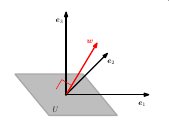
Fig.7 A plane U in a three-dimensional vector space can be described by its normal vector, which spans its orthogonal complement U ⊥ .

## Inner Product of Functions

Thus far, we looked at properties of inner products to compute lengths, angles, and distances. We focused on inner products of finite-dimensional vectors. In the following, we will look at an example of inner products of a different type of vectors: inner products of functions.

The inner products we discussed so far were defined for vectors with a finite number of entries. We can think of a vector $ x \in \mathbb{R}^n $ as a function with $ n $ function values. The concept of an inner product can be generalized to vectors with an infinite number of entries (countably infinite) and also continuous-valued functions (uncountably infinite). Then the sum over individual components of vectors (see Equation (3.5) for example) turns into an integral.

An inner product of two functions $ u : \mathbb{R} \to \mathbb{R} $ and $ v : \mathbb{R} \to \mathbb{R} $ can be defined as the definite integral

$$
\langle u, v \rangle := \int_a^b u(x) v(x) \, dx \tag{3.37}
$$

In [3]:
import math

# --- Dot Product (Standard Inner Product) ---
def dot_product(x, y):
    """
    Compute the dot product of two vectors: x^T y = sum(x_i * y_i)
    """
    return sum(xi * yi for xi, yi in zip(x, y))

# --- Norm Induced by Dot Product ---
def norm(x):
    """
    Compute the Euclidean norm of a vector: ||x|| = sqrt(x^T x)
    """
    return math.sqrt(dot_product(x, x))

# --- Gram-Schmidt Process ---
def gram_schmidt(vectors):
    """
    Apply the Gram-Schmidt process to convert a set of linearly independent vectors
    into an orthonormal basis.
    """
    if not vectors:
        return []
    
    orthonormal_basis = []
    for k, vk in enumerate(vectors):
        # Subtract projections onto previous orthonormal vectors
        uk = vk[:]
        for uj in orthonormal_basis:
            proj = dot_product(uk, uj)
            uk = [uki - proj * uji for uki, uji in zip(uk, uj)]
        
        # Normalize the resulting vector
        norm_uk = norm(uk)
        if norm_uk < 1e-10:
            raise ValueError(f"Vector {vk} is linearly dependent on previous vectors")
        orthonormal_basis.append([uki / norm_uk for uki in uk])
    
    return orthonormal_basis

# --- Compute Orthogonal Complement (Section 3.6) ---
def orthogonal_complement(U, V_dim):
    """
    Compute the orthogonal complement U^perp of a subspace U in V.
    V_dim is the dimension of V, and U is a list of basis vectors for the subspace.
    """
    # Step 1: Orthonormalize the basis of U
    U_basis = gram_schmidt(U)
    n = len(U_basis)  # Dimension of U
    if n > V_dim:
        raise ValueError("Dimension of U cannot exceed dimension of V")
    
    # Step 2: Extend U_basis to a basis of V by adding orthogonal vectors
    extended_basis = U_basis[:]
    standard_basis = [[1.0 if i == j else 0.0 for i in range(V_dim)] for j in range(V_dim)]
    
    for e in standard_basis:
        # Project e onto the current basis and take the orthogonal component
        e_ortho = e[:]
        for b in extended_basis:
            proj = dot_product(e_ortho, b)
            e_ortho = [ei - proj * bi for ei, bi in zip(e_ortho, b)]
        
        # If the orthogonal component is non-zero, add it to the basis
        norm_e_ortho = norm(e_ortho)
        if norm_e_ortho > 1e-10:
            extended_basis.append([ei / norm_e_ortho for ei in e_ortho])
        
        # Stop once we have V_dim vectors
        if len(extended_basis) == V_dim:
            break
    
    # Step 3: The last (V_dim - n) vectors form a basis for U^perp
    # Since extended_basis is already orthogonal, we just need to confirm
    return extended_basis[n:]

# --- Vector Decomposition (Equation 3.36) ---
def decompose_vector(x, U_basis, U_perp_basis):
    """
    Decompose a vector x into components in U and U^perp:
    x = sum(lambda_m * b_m) + sum(psi_j * b_j^perp)
    Returns the coefficients lambda_m and psi_j.
    """
    lambda_coeffs = [dot_product(x, bm) for bm in U_basis]
    psi_coeffs = [dot_product(x, bj_perp) for bj_perp in U_perp_basis]
    return lambda_coeffs, psi_coeffs

# --- Numerical Integration (Trapezoidal Rule) for Inner Product of Functions ---
def trapezoidal_integrate(u, v, a, b, n=1000):
    """
    Approximate the integral of u(x) * v(x) from a to b using the trapezoidal rule.
    """
    if a >= b:
        raise ValueError("Lower limit a must be less than upper limit b")
    
    h = (b - a) / n
    integral = 0.0
    for i in range(n + 1):
        x = a + i * h
        if i == 0 or i == n:
            integral += u(x) * v(x) / 2
        else:
            integral += u(x) * v(x)
    integral *= h
    return integral

# --- Inner Product of Functions (Equation 3.37) ---
def function_inner_product(u, v, a, b):
    """
    Compute the inner product of two functions u and v over [a, b]:
    <u, v> = integral from a to b of u(x) v(x) dx
    """
    return trapezoidal_integrate(u, v, a, b)

# --- Run the Implementation ---
# Orthogonal Complement and Decomposition (Section 3.6, Equation 3.36)
print("Orthogonal Complement and Vector Decomposition (Section 3.6):")
U = [[1.0, 1.0, 0.0]]  # Subspace U in R^3 (a plane)
V_dim = 3
print(f"Subspace U spanned by: {U}")
U_basis = gram_schmidt(U)
U_perp_basis = orthogonal_complement(U, V_dim)
print(f"Orthonormal basis for U: {[[round(x, 3) for x in v] for v in U_basis]}")
print(f"Orthonormal basis for U^perp: {[[round(x, 3) for x in v] for v in U_perp_basis]}")

# Decompose a vector x
x = [1.0, 2.0, 3.0]
lambda_coeffs, psi_coeffs = decompose_vector(x, U_basis, U_perp_basis)
print(f"\nVector x = {x}")
print(f"Coefficients in U (lambda_m): {[round(c, 3) for c in lambda_coeffs]}")
print(f"Coefficients in U^perp (psi_j): {[round(c, 3) for c in psi_coeffs]}")

# Verify decomposition
x_reconstructed = [0.0] * V_dim
for lm, bm in zip(lambda_coeffs, U_basis):
    for i in range(V_dim):
        x_reconstructed[i] += lm * bm[i]
for pj, bj in zip(psi_coeffs, U_perp_basis):
    for i in range(V_dim):
        x_reconstructed[i] += pj * bj[i]
print(f"Reconstructed x: {[round(xi, 3) for xi in x_reconstructed]}")
print(f"Decomposition correct: {all(abs(xi - xri) < 1e-10 for xi, xri in zip(x, x_reconstructed))}\n")

# Inner Product of Functions (Section 3.7, Equation 3.37)
print("Inner Product of Functions (Section 3.7):")
def u(x):
    return x**2
def v(x):
    return x

a, b = 0, 1
inner_prod = function_inner_product(u, v, a, b)
print(f"Functions: u(x) = x^2, v(x) = x")
print(f"Inner product over [{a}, {b}]: {inner_prod:.4f}")
print(f"Expected value (integral of x^3 from 0 to 1): {1/4} = 0.25")

Orthogonal Complement and Vector Decomposition (Section 3.6):
Subspace U spanned by: [[1.0, 1.0, 0.0]]
Orthonormal basis for U: [[0.707, 0.707, 0.0]]
Orthonormal basis for U^perp: [[0.707, -0.707, 0.0], [0.0, 0.0, 1.0]]

Vector x = [1.0, 2.0, 3.0]
Coefficients in U (lambda_m): [2.121]
Coefficients in U^perp (psi_j): [-0.707, 3.0]
Reconstructed x: [1.0, 2.0, 3.0]
Decomposition correct: True

Inner Product of Functions (Section 3.7):
Functions: u(x) = x^2, v(x) = x
Inner product over [0, 1]: 0.2500
Expected value (integral of x^3 from 0 to 1): 0.25 = 0.25


for lower and upper limits $ a $, $ b < \infty $, respectively. As with our usual inner product, we can define norms and orthogonality by looking at the inner product. If (3.37) evaluates to 0, the functions $ u $ and $ v $ are orthogonal. To make the preceding inner product mathematically precise, we need to take care of measures and the definition of integrals, leading to the definition of a Hilbert space. Furthermore, unlike inner products on finite-dimensional vectors, inner products on functions may diverge (have infinite value). All this requires diving into some more intricate details of real and functional analysis, which we do not cover in this book.

### Example  (Inner Product of Functions)

If we choose $ u = \sin(x) $ and $ v = \cos(x) $, the integrand $ f(x) = u(x) v(x) $ of (3.37), is shown in Figure 3.8. We see that this function is odd, i.e., $ f(-x) = -f(x) $. Therefore, the integral with limits $ a = -\pi $, $ b = \pi $ of this product evaluates to 0. Therefore, $ \sin $ and $ \cos $ are orthogonal functions.

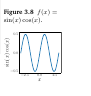

**Fig.8** $ f(x) = \sin(x) \cos(x) $

**Remark.** It also holds that the collection of functions

$$
\{1, \cos(x), \cos(2x), \cos(3x), \ldots\} \tag{3.38}
$$

is orthogonal if we integrate from $ -\pi $ to $ \pi $, i.e., any pair of functions are orthogonal to each other. The collection of functions in (3.38) spans a large subspace of the functions that are even and periodic on $ [-\pi, \pi) $, and projecting functions onto this subspace is the fundamental idea behind Fourier series. $ \diamond $

In Section 6.4.6, we will have a look at a second type of unconventional inner products: the inner product of random variables.

## Orthogonal Projections

Projections are an important class of linear transformations (besides rotations and reflections) and play an important role in graphics, coding theory, statistics, and machine learning. In machine learning, we often deal with data that is high-dimensional. High-dimensional data is often hard to analyze or visualize. However, high-dimensional data quite often possesses the property that only a few dimensions contain most information, and most other dimensions are not essential to describe key properties of the data. When we compress or visualize high-dimensional data, we will lose information. To minimize this compression loss, we ideally find the most informative dimensions in the data. As discussed in Chapter 1, “Feature” is a common expression for data representation. Data can be represented as vectors, and in this chapter, we will discuss some of the fundamental tools for data compression. More specifically, we can project the original high-dimensional data onto a lower-dimensional feature space and work in this lower-dimensional space to learn more about the dataset and extract relevant patterns. For example, machine

In [4]:
import math

# --- Dot Product (Standard Inner Product) ---
def dot_product(x, y):
    """
    Compute the dot product of two vectors: x^T y = sum(x_i * y_i)
    """
    return sum(xi * yi for xi, yi in zip(x, y))

# --- Norm Induced by Dot Product ---
def norm(x):
    """
    Compute the Euclidean norm of a vector: ||x|| = sqrt(x^T x)
    """
    return math.sqrt(dot_product(x, x))

# --- Numerical Integration (Trapezoidal Rule) for Inner Product of Functions ---
def trapezoidal_integrate(u, v, a, b, n=1000):
    """
    Approximate the integral of u(x) * v(x) from a to b using the trapezoidal rule.
    u and v are functions, a and b are the limits, n is the number of intervals.
    """
    if a >= b:
        raise ValueError("Lower limit a must be less than upper limit b")
    
    h = (b - a) / n  # Step size
    integral = 0.0
    for i in range(n + 1):
        x = a + i * h
        if i == 0 or i == n:
            integral += u(x) * v(x) / 2  # Endpoints have weight 1/2
        else:
            integral += u(x) * v(x)  # Interior points have weight 1
    integral *= h
    return integral

# --- Inner Product of Functions (Example 3.9) ---
def function_inner_product(u, v, a, b):
    """
    Compute the inner product of two functions u and v over [a, b]:
    <u, v> = integral from a to b of u(x) v(x) dx
    """
    return trapezoidal_integrate(u, v, a, b)

# --- Gram-Schmidt Process ---
def gram_schmidt(vectors):
    """
    Apply the Gram-Schmidt process to convert a set of linearly independent vectors
    into an orthonormal basis.
    """
    if not vectors:
        return []
    
    orthonormal_basis = []
    for k, vk in enumerate(vectors):
        uk = vk[:]
        for uj in orthonormal_basis:
            proj = dot_product(uk, uj)
            uk = [uki - proj * uji for uki, uji in zip(uk, uj)]
        
        norm_uk = norm(uk)
        if norm_uk < 1e-10:
            raise ValueError(f"Vector {vk} is linearly dependent on previous vectors")
        orthonormal_basis.append([uki / norm_uk for uki in uk])
    
    return orthonormal_basis

# --- Orthogonal Projection onto a Subspace (Section 3.8) ---
def orthogonal_projection(x, subspace_basis):
    """
    Compute the orthogonal projection of vector x onto the subspace spanned by
    the given basis vectors.
    """
    # Orthonormalize the basis
    ortho_basis = gram_schmidt(subspace_basis)
    
    # Project x onto each basis vector
    projection = [0.0] * len(x)
    for b in ortho_basis:
        coeff = dot_product(x, b)
        projection = [pi + coeff * bi for pi, bi in zip(projection, b)]
    
    return projection

# --- Run the Implementation ---
# Example 3.9: Inner Product of sin(x) and cos(x) over [-pi, pi]
print("Example 3.9: Inner Product of Functions")
def u(x):
    return math.sin(x)
def v(x):
    return math.cos(x)

a, b = -math.pi, math.pi
inner_prod = function_inner_product(u, v, a, b)
print(f"Functions: u(x) = sin(x), v(x) = cos(x)")
print(f"Inner product over [{a:.2f}, {b:.2f}]: {inner_prod:.4f}")
print(f"Functions are orthogonal: {abs(inner_prod) < 1e-5}\n")

# Orthogonal Projection (Section 3.8)
print("Orthogonal Projection (Section 3.8):")
# Example: Project a vector in R^3 onto a 2D subspace (plane)
x = [1.0, 2.0, 3.0]  # Vector to project
subspace_basis = [[1.0, 1.0, 0.0], [0.0, 0.0, 1.0]]  # Spans a plane in R^3
projection = orthogonal_projection(x, subspace_basis)
print(f"Vector x = {x}")
print(f"Subspace basis: {subspace_basis}")
print(f"Projection of x onto subspace: {[round(p, 3) for p in projection]}")

# Verify orthogonality of the error vector (x - projection) to the subspace
error = [xi - pi for xi, pi in zip(x, projection)]
ortho_to_basis = all(abs(dot_product(error, b)) < 1e-10 for b in gram_schmidt(subspace_basis))


print(f"Error vector (x - projection): {[round(e, 3) for e in error]}")
print(f"Error is orthogonal to subspace: {ortho_to_basis}")

Example 3.9: Inner Product of Functions
Functions: u(x) = sin(x), v(x) = cos(x)
Inner product over [-3.14, 3.14]: 0.0000
Functions are orthogonal: True

Orthogonal Projection (Section 3.8):
Vector x = [1.0, 2.0, 3.0]
Subspace basis: [[1.0, 1.0, 0.0], [0.0, 0.0, 1.0]]
Projection of x onto subspace: [1.5, 1.5, 3.0]
Error vector (x - projection): [-0.5, 0.5, 0.0]
Error is orthogonal to subspace: True


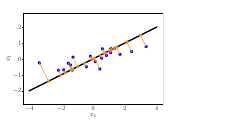

**Fig.9** Orthogonal projection (orange dots) of a two-dimensional dataset (blue dots) onto a one-dimensional subspace (straight line).

learning algorithms, such as principal component analysis (PCA) by Pearson (1901) and Hotelling (1933) and deep neural networks (e.g., deep auto-encoders (Deng et al., 2010)), heavily exploit the idea of dimensionality reduction. In the following, we will focus on orthogonal projections, which we will use in Chapter 10 for linear dimensionality reduction and in Chapter 12 for classification. Even linear regression, which we discuss in Chapter 9, can be interpreted using orthogonal projections. For a given lower-dimensional subspace, orthogonal projections of high-dimensional data retain as much information as possible and minimize the difference/error between the original data and the corresponding projection. An illustration of such an orthogonal projection is given in Figure 3.9.

Before we detail how to obtain these projections, let us define what a projection actually is.

### Definition 3.10 (Projection)

Let $ V $ be a vector space and $ U \subseteq V $ a subspace of $ V $. A linear mapping $ \pi : V \to U $ is called a **projection** if

$$
\pi^2 = \pi \circ \pi = \pi.
$$

Since linear mappings can be expressed by transformation matrices (see Section 2.7), the preceding definition applies equally to a special kind of transformation matrices, the projection matrices $ P_\pi $, which exhibit the property that $ P_\pi^2 = P_\pi $.

In the following, we will derive orthogonal projections of vectors in the inner product space $ (\mathbb{R}^n, \langle \cdot, \cdot \rangle) $ onto subspaces. We will start with one-dimensional subspaces, which are also called lines. If not mentioned otherwise, we assume the dot product $ \langle x, y \rangle = x^\top y $ as the inner product.

##  Projection onto One-Dimensional Subspaces (Lines)

Assume we are given a line (one-dimensional subspace) through the origin with basis vector $ b \in \mathbb{R}^n $. The line is a one-dimensional subspace $ U \subseteq \mathbb{R}^n $ spanned by $ b $. When we project $ x \in \mathbb{R}^n $ onto $ U $, we seek the vector $ \pi_U(x) \in U $ that is closest to $ x $. Using geometric arguments, let

In [5]:
import math

# --- Dot Product (Standard Inner Product) ---
def dot_product(x, y):
    """
    Compute the dot product of two vectors: x^T y = sum(x_i * y_i)
    """
    return sum(xi * yi for xi, yi in zip(x, y))

# --- Norm Induced by Dot Product ---
def norm(x):
    """
    Compute the Euclidean norm of a vector: ||x|| = sqrt(x^T x)
    """
    return math.sqrt(dot_product(x, x))

# --- Projection onto a One-Dimensional Subspace (Section 3.8.1) ---
def project_onto_line(x, b):
    """
    Project vector x onto the line (one-dimensional subspace) spanned by vector b.
    The projection is: pi_U(x) = (<x, b> / <b, b>) * b
    """
    if norm(b) < 1e-10:
        raise ValueError("Basis vector b cannot be zero")
    
    # Compute the coefficient: <x, b> / <b, b>
    coeff = dot_product(x, b) / dot_product(b, b)
    
    # Projection: (coefficient) * b
    projection = [coeff * bi for bi in b]
    return projection

# --- Construct Projection Matrix (Definition 3.10) ---
def projection_matrix(b):
    """
    Construct the projection matrix P for the subspace spanned by vector b.
    P = (b b^T) / (b^T b), where b is treated as a column vector.
    """
    n = len(b)
    if norm(b) < 1e-10:
        raise ValueError("Basis vector b cannot be zero")
    
    # Compute b^T b (a scalar)
    bTb = dot_product(b, b)
    
    # Compute the matrix P = (b b^T) / (b^T b)
    P = [[0.0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            P[i][j] = b[i] * b[j] / bTb
    
    return P

# --- Matrix-Vector Multiplication ---
def matrix_vector_multiply(A, x):
    """
    Multiply matrix A by vector x.
    """
    n = len(A)
    result = [0.0] * n
    for i in range(n):
        for j in range(n):
            result[i] += A[i][j] * x[j]
    return result

# --- Matrix-Matrix Multiplication ---
def matrix_multiply(A, B):
    """
    Multiply two matrices A and B.
    """
    n = len(A)
    result = [[0.0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                result[i][j] += A[i][k] * B[k][j]
    return result

# --- Verify Projection Matrix Property (P^2 = P) ---
def verify_projection_matrix(P):
    """
    Verify that the projection matrix satisfies P^2 = P.
    """
    P2 = matrix_multiply(P, P)
    # Check if P2 equals P within numerical tolerance
    n = len(P)
    for i in range(n):
        for j in range(n):
            if abs(P2[i][j] - P[i][j]) > 1e-10:
                return False
    return True

# --- Run the Implementation ---
# Projection onto a One-Dimensional Subspace (Section 3.8.1)
print("Projection onto a One-Dimensional Subspace (Section 3.8.1):")
x = [1.0, 2.0, 3.0]  # Vector to project
b = [1.0, 1.0, 0.0]  # Basis vector of the line
projection = project_onto_line(x, b)
print(f"Vector x = {x}")
print(f"Line spanned by b = {b}")
print(f"Projection of x onto line: {[round(p, 3) for p in projection]}")

# Verify orthogonality of the error vector (x - projection) to b
error = [xi - pi for xi, pi in zip(x, projection)]
error_dot_b = dot_product(error, b)
print(f"Error vector (x - projection): {[round(e, 3) for e in error]}")
print(f"Error is orthogonal to b: {abs(error_dot_b) < 1e-10}\n")

# Projection Matrix (Definition 3.10)
print("Projection Matrix (Definition 3.10):")
P = projection_matrix(b)
print("Projection matrix P:")
for row in P:
    print([round(val, 3) for val in row])

# Verify P^2 = P
is_idempotent = verify_projection_matrix(P)
print(f"P satisfies P^2 = P: {is_idempotent}")

# Project x using the projection matrix and compare
proj_matrix = matrix_vector_multiply(P, x)
print(f"Projection using matrix: {[round(p, 3) for p in proj_matrix]}")
print(f"Matches direct projection: {all(abs(p1 - p2) < 1e-10 for p1, p2 in zip(projection, proj_matrix))}")

Projection onto a One-Dimensional Subspace (Section 3.8.1):
Vector x = [1.0, 2.0, 3.0]
Line spanned by b = [1.0, 1.0, 0.0]
Projection of x onto line: [1.5, 1.5, 0.0]
Error vector (x - projection): [-0.5, 0.5, 3.0]
Error is orthogonal to b: True

Projection Matrix (Definition 3.10):
Projection matrix P:
[0.5, 0.5, 0.0]
[0.5, 0.5, 0.0]
[0.0, 0.0, 0.0]
P satisfies P^2 = P: True
Projection using matrix: [1.5, 1.5, 0.0]
Matches direct projection: True


##  Orthogonal Projections

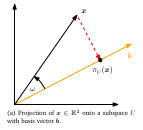
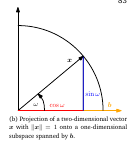
**Fig.10** Examples of projections onto one-dimensional subspaces.

(a) Projection of $ x \in \mathbb{R}^2 $ onto a subspace $ U $ with basis vector $ b $.

(b) Projection of a two-dimensional vector $ x $ with $ \|x\| = 1 $ onto a one-dimensional subspace spanned by $ b $.

Let us characterize some properties of the projection $ \pi_U(x) $ (Figure 3.10(a) serves as an illustration): The projection $ \pi_U(x) $ is closest to $ x $, where “closest” implies that the distance $ \|x - \pi_U(x)\| $ is minimal. It follows that the segment $ \pi_U(x) - x $ from $ \pi_U(x) $ to $ x $ is orthogonal to $ U $, and therefore the basis vector $ b $ of $ U $. The orthogonality condition yields $ \langle \pi_U(x) - x, b \rangle = 0 $ since angles between vectors are defined via the inner product.

The projection $ \pi_U(x) $ of $ x $ onto $ U $ must be an element of $ U $ and, therefore, a multiple of the basis vector $ b $ that spans $ U $. Hence,

$$
\pi_U(x) = \lambda b,
$$

for some $ \lambda \in \mathbb{R} $.

In the following three steps, we determine the coordinate $ \lambda $, the projection $ \pi_U(x) \in U $, and the projection matrix $ P_\pi $ that maps any $ x \in \mathbb{R}^n $ onto $ U $:

1. **Finding the coordinate $ \lambda $**. The orthogonality condition yields

$$
\langle x - \pi_U(x), b \rangle = 0 \quad \iff \quad \langle x - \lambda b, b \rangle = 0. \tag{3.39}
$$

We can now exploit the bilinearity of the inner product and arrive at

$$
\langle x, b \rangle - \lambda \langle b, b \rangle = 0 \quad \iff \quad \lambda = \frac{\langle x, b \rangle}{\langle b, b \rangle} = \frac{\langle b, x \rangle}{\|b\|^2}. \tag{3.40}
$$

In the last step, we exploited the fact that inner products are symmetric. If we choose $ \langle \cdot, \cdot \rangle $ to be the dot product, we obtain

$$
\lambda = \frac{b^\top x}{b^\top b} = \frac{b^\top x}{\|b\|^2}. \tag{3.41}
$$

If $ \|b\| = 1 $, then the coordinate $ \lambda $ of the projection is given by $ b^\top x $.

In [6]:
import math

# --- Dot Product (Standard Inner Product) ---
def dot_product(x, y):
    """
    Compute the dot product of two vectors: x^T y = sum(x_i * y_i)
    """
    return sum(xi * yi for xi, yi in zip(x, y))

# --- Norm Induced by Dot Product ---
def norm(x):
    """
    Compute the Euclidean norm of a vector: ||x|| = sqrt(x^T x)
    """
    return math.sqrt(dot_product(x, x))

# --- Projection onto a One-Dimensional Subspace (Section 3.8.1) ---
def project_onto_line(x, b):
    """
    Project vector x onto the line (one-dimensional subspace) spanned by vector b.
    Uses the dot product as the inner product.
    From Equation 3.41: lambda = (b^T x) / (b^T b), pi_U(x) = lambda * b
    Returns the projection pi_U(x) and the coordinate lambda.
    """
    if norm(b) < 1e-10:
        raise ValueError("Basis vector b cannot be zero")
    
    # Compute lambda (Equation 3.41): lambda = (b^T x) / (b^T b)
    bTx = dot_product(b, x)
    bTb = dot_product(b, b)
    lambda_coeff = bTx / bTb
    
    # Compute the projection: pi_U(x) = lambda * b
    projection = [lambda_coeff * bi for bi in b]
    return projection, lambda_coeff

# --- Run the Implementation ---
# Example: Project a vector in R^3 onto a line
print("Projection onto a One-Dimensional Subspace (Section 3.8.1):")
x = [1.0, 2.0, 3.0]  # Vector to project
b = [1.0, 1.0, 0.0]  # Basis vector of the line
projection, lambda_coeff = project_onto_line(x, b)
print(f"Vector x = {x}")
print(f"Line spanned by b = {b}")
print(f"Coordinate lambda = {lambda_coeff:.3f}")
print(f"Projection pi_U(x) = {[round(p, 3) for p in projection]}")

# Verify orthogonality (Equation 3.39): <x - pi_U(x), b> = 0
error = [xi - pi for xi, pi in zip(x, projection)]
error_dot_b = dot_product(error, b)
print(f"Error vector (x - pi_U(x)) = {[round(e, 3) for e in error]}")
print(f"Error is orthogonal to b: {abs(error_dot_b) < 1e-10}")

# Additional Test: When ||b|| = 1, lambda should be b^T x
print("\nTest with unit norm b (||b|| = 1):")
b_unit = [1/math.sqrt(2), 1/math.sqrt(2), 0.0]  # Normalize b
projection_unit, lambda_unit = project_onto_line(x, b_unit)
print(f"Unit basis vector b = {[round(bi, 3) for bi in b_unit]}")
print(f"Norm of b: {norm(b_unit):.3f}")
print(f"Coordinate lambda = {lambda_unit:.3f}")
print(f"Expected lambda (b^T x) = {dot_product(b_unit, x):.3f}")
print(f"Projection pi_U(x) = {[round(p, 3) for p in projection_unit]}")

Projection onto a One-Dimensional Subspace (Section 3.8.1):
Vector x = [1.0, 2.0, 3.0]
Line spanned by b = [1.0, 1.0, 0.0]
Coordinate lambda = 1.500
Projection pi_U(x) = [1.5, 1.5, 0.0]
Error vector (x - pi_U(x)) = [-0.5, 0.5, 3.0]
Error is orthogonal to b: True

Test with unit norm b (||b|| = 1):
Unit basis vector b = [0.707, 0.707, 0.0]
Norm of b: 1.000
Coordinate lambda = 2.121
Expected lambda (b^T x) = 2.121
Projection pi_U(x) = [1.5, 1.5, 0.0]


2. **Finding the projection point $ \pi_U(x) \in U $**. Since $ \pi_U(x) = \lambda b $, we immediately obtain with (3.40) that

$$
\pi_U(x) = \lambda b = \frac{\langle x, b \rangle}{\|b\|^2} b = \frac{b^\top x}{\|b\|^2} b, \tag{3.42}
$$

where the last equality holds for the dot product only. We can also compute the length of $ \pi_U(x) $ by means of Definition 3.1 as

$$
\|\pi_U(x)\| = \|\lambda b\| = |\lambda| \|b\|. \tag{3.43}
$$

Hence, our projection is of length $ |\lambda| $ times the length of $ b $. This also adds the intuition that $ \lambda $ is the coordinate of $ \pi_U(x) $ with respect to the basis vector $ b $ that spans our one-dimensional subspace $ U $.

If we use the dot product as an inner product, we get

$$
\|\pi_U(x)\| = \|\lambda b\| = |\lambda| \|b\| = \frac{|b^\top x|}{\|b\|^2} \|b\| \stackrel{(3.25)}{=} |\cos \omega| \|x\| \frac{\|b\|}{\|b\|} = |\cos \omega| \|x\|. \tag{3.44}
$$

Here, $ \omega $ is the angle between $ x $ and $ b $. This equation should be familiar from trigonometry: If $ \|x\| = 1 $, then $ x $ lies on the unit circle. It follows that the projection onto the horizontal axis spanned by $ b $ is exactly $ \cos \omega $, and the length of the corresponding vector $ \pi_U(x) = |\cos \omega| $. An illustration is given in Figure 3.10(b).

3. **Finding the projection matrix $ P_\pi $**. We know that a projection is a linear mapping (see Definition 3.10). Therefore, there exists a projection matrix $ P_\pi $, such that $ \pi_U(x) = P_\pi x $. With the dot product as inner product and

$$
\pi_U(x) = \lambda b = b \lambda = b \frac{b^\top x}{\|b\|^2} = \frac{b b^\top}{\|b\|^2} x, \tag{3.45}
$$

we immediately see that

$$
P_\pi = \frac{b b^\top}{\|b\|^2}. \tag{3.46}
$$

Note that $ b b^\top $ (and, consequently, $ P_\pi $) is a symmetric matrix (of rank 1), and $ \|b\|^2 = \langle b, b \rangle $ is a scalar. The projection matrix $ P_\pi $ projects any vector $ x \in \mathbb{R}^n $ onto the line through the origin with direction $ b $ (equivalently, the subspace $ U $ spanned by $ b $).

**Remark.** The projection $ \pi_U(x) \in \mathbb{R}^n $ is still an $ n $-dimensional vector and not a scalar. However, we no longer require $ n $ coordinates to represent the projection, but only a single one if we want to express it with respect to the basis vector $ b $ that spans the subspace $ U $: $ \lambda $. $ \diamond $

2. **Finding the projection point $ \pi_U(x) \in U $**. Since $ \pi_U(x) = \lambda b $, we immediately obtain with (3.40) that

$$
\pi_U(x) = \lambda b = \frac{\langle x, b \rangle}{\|b\|^2} b = \frac{b^\top x}{\|b\|^2} b, \tag{3.42}
$$

where the last equality holds for the dot product only. We can also compute the length of $ \pi_U(x) $ by means of Definition 3.1 as

$$
\|\pi_U(x)\| = \|\lambda b\| = |\lambda| \|b\|. \tag{3.43}
$$

Hence, our projection is of length $ |\lambda| $ times the length of $ b $. This also adds the intuition that $ \lambda $ is the coordinate of $ \pi_U(x) $ with respect to the basis vector $ b $ that spans our one-dimensional subspace $ U $.

If we use the dot product as an inner product, we get

$$
\|\pi_U(x)\| = \|\lambda b\| = |\lambda| \|b\| = \frac{|b^\top x|}{\|b\|^2} \|b\| \stackrel{(3.25)}{=} |\cos \omega| \|x\| \frac{\|b\|}{\|b\|} = |\cos \omega| \|x\|. \tag{3.44}
$$

Here, $ \omega $ is the angle between $ x $ and $ b $. This equation should be familiar from trigonometry: If $ \|x\| = 1 $, then $ x $ lies on the unit circle. It follows that the projection onto the horizontal axis spanned by $ b $ is exactly $ \cos \omega $, and the length of the corresponding vector $ \pi_U(x) = |\cos \omega| $. An illustration is given in Figure 3.10(b).

3. **Finding the projection matrix $ P_\pi $**. We know that a projection is a linear mapping (see Definition 3.10). Therefore, there exists a projection matrix $ P_\pi $, such that $ \pi_U(x) = P_\pi x $. With the dot product as inner product and

$$
\pi_U(x) = \lambda b = b \lambda = b \frac{b^\top x}{\|b\|^2} = \frac{b b^\top}{\|b\|^2} x, \tag{3.45}
$$

we immediately see that

$$
P_\pi = \frac{b b^\top}{\|b\|^2}. \tag{3.46}
$$

Note that $ b b^\top $ (and, consequently, $ P_\pi $) is a symmetric matrix (of rank 1), and $ \|b\|^2 = \langle b, b \rangle $ is a scalar. The projection matrix $ P_\pi $ projects any vector $ x \in \mathbb{R}^n $ onto the line through the origin with direction $ b $ (equivalently, the subspace $ U $ spanned by $ b $).

**Remark.** The projection $ \pi_U(x) \in \mathbb{R}^n $ is still an $ n $-dimensional vector and not a scalar. However, we no longer require $ n $ coordinates to represent the projection, but only a single one if we want to express it with respect to the basis vector $ b $ that spans the subspace $ U $: $ \lambda $. $ \diamond $

In [7]:
import math

# --- Dot Product (Standard Inner Product) ---
def dot_product(x, y):
    """
    Compute the dot product of two vectors: x^T y = sum(x_i * y_i)
    """
    return sum(xi * yi for xi, yi in zip(x, y))

# --- Norm Induced by Dot Product ---
def norm(x):
    """
    Compute the Euclidean norm of a vector: ||x|| = sqrt(x^T x)
    """
    return math.sqrt(dot_product(x, x))

# --- Compute Angle Between Vectors ---
def compute_angle(x, b):
    """
    Compute the angle omega between vectors x and b using the dot product.
    cos(omega) = <x, b> / (||x|| ||b||), omega in [0, pi]
    Returns the angle in radians.
    """
    if norm(x) < 1e-10 or norm(b) < 1e-10:
        raise ValueError("Vectors must be non-zero to compute the angle")
    
    cos_omega = dot_product(x, b) / (norm(x) * norm(b))
    # Ensure cos_omega is in [-1, 1] to avoid numerical errors
    cos_omega = max(min(cos_omega, 1.0), -1.0)
    return math.acos(cos_omega)

# --- Projection onto a One-Dimensional Subspace (Equation 3.42) ---
def project_onto_line(x, b):
    """
    Project vector x onto the line spanned by vector b using the dot product.
    From Equation 3.42: pi_U(x) = (b^T x / ||b||^2) * b
    Returns the projection pi_U(x) and the coordinate lambda.
    """
    if norm(b) < 1e-10:
        raise ValueError("Basis vector b cannot be zero")
    
    bTb = dot_product(b, b)  # ||b||^2
    bTx = dot_product(b, x)
    lambda_coeff = bTx / bTb  # lambda = (b^T x) / (b^T b)
    projection = [lambda_coeff * bi for bi in b]  # pi_U(x) = lambda * b
    return projection, lambda_coeff

# --- Construct Projection Matrix (Equations 3.45 and 3.46) ---
def projection_matrix(b):
    """
    Construct the projection matrix P_pi for the subspace spanned by vector b.
    From Equation 3.46: P_pi = (b b^T) / (||b||^2)
    """
    n = len(b)
    if norm(b) < 1e-10:
        raise ValueError("Basis vector b cannot be zero")
    
    bTb = dot_product(b, b)  # ||b||^2
    P = [[0.0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            P[i][j] = b[i] * b[j] / bTb  # (b b^T) / (b^T b)
    return P

# --- Matrix-Vector Multiplication ---
def matrix_vector_multiply(A, x):
    """
    Multiply matrix A by vector x.
    """
    n = len(A)
    result = [0.0] * n
    for i in range(n):
        for j in range(n):
            result[i] += A[i][j] * x[j]
    return result

# --- Matrix-Matrix Multiplication ---
def matrix_multiply(A, B):
    """
    Multiply two matrices A and B.
    """
    n = len(A)
    result = [[0.0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                result[i][j] += A[i][k] * B[k][j]
    return result

# --- Verify Projection Matrix Property (P^2 = P) ---
def verify_projection_matrix(P):
    """
    Verify that the projection matrix satisfies P^2 = P.
    """
    P2 = matrix_multiply(P, P)
    n = len(P)
    for i in range(n):
        for j in range(n):
            if abs(P2[i][j] - P[i][j]) > 1e-10:
                return False
    return True

# --- Run the Implementation ---
# Step 2: Finding the Projection Point (Equation 3.42)
print("Step 2: Finding the Projection Point (Equation 3.42)")
x = [1.0, 2.0, 3.0]
b = [1.0, 1.0, 0.0]
projection, lambda_coeff = project_onto_line(x, b)
print(f"Vector x = {x}")
print(f"Basis vector b = {b}")
print(f"Coordinate lambda = {lambda_coeff:.3f}")
print(f"Projection pi_U(x) = {[round(p, 3) for p in projection]}")

# Compute the length of pi_U(x) (Equation 3.43)
proj_norm = norm(projection)
expected_norm = abs(lambda_coeff) * norm(b)
print(f"\nStep 2: Length of Projection (Equation 3.43)")
print(f"||pi_U(x)|| = {proj_norm:.3f}")
print(f"|lambda| * ||b|| = {expected_norm:.3f}")
print(f"Length matches: {abs(proj_norm - expected_norm) < 1e-10}")

# Verify the trigonometric interpretation (Equation 3.44)
omega = compute_angle(x, b)
cos_omega = math.cos(omega)
norm_x = norm(x)
norm_b = norm(b)
expected_norm_trig = abs(cos_omega) * norm_x
print(f"\nStep 2: Trigonometric Length (Equation 3.44)")
print(f"Angle omega = {omega:.3f} radians")
print(f"|cos(omega)| * ||x|| = {expected_norm_trig:.3f}")
print(f"Matches ||pi_U(x)||: {abs(proj_norm - expected_norm_trig) < 1e-10}")

# Test with ||x|| = 1
x_unit = [xi / norm_x for xi in x]  # Normalize x
proj_unit, lambda_unit = project_onto_line(x_unit, b)
proj_unit_norm = norm(proj_unit)
cos_omega_unit = math.cos(compute_angle(x_unit, b))
print(f"\nTest with ||x|| = 1:")
print(f"Unit vector x = {[round(xi, 3) for xi in x_unit]}")
print(f"Projection pi_U(x) = {[round(p, 3) for p in proj_unit]}")
print(f"||pi_U(x)|| = {proj_unit_norm:.3f}")
print(f"|cos(omega)| = {abs(cos_omega_unit):.3f}")
print(f"Matches |cos(omega)|: {abs(proj_unit_norm - abs(cos_omega_unit)) < 1e-10}\n")

# Step 3: Finding the Projection Matrix (Equations 3.45 and 3.46)
print("Step 3: Finding the Projection Matrix (Equations 3.45 and 3.46)")
P = projection_matrix(b)
print("Projection matrix P:")
for row in P:
    print([round(val, 3) for val in row])

# Verify P^2 = P
is_idempotent = verify_projection_matrix(P)
print(f"P satisfies P^2 = P: {is_idempotent}")

# Project x using the projection matrix and compare
proj_matrix = matrix_vector_multiply(P, x)
print(f"Projection using matrix: {[round(p, 3) for p in proj_matrix]}")
print(f"Matches direct projection: {all(abs(p1 - p2) < 1e-10 for p1, p2 in zip(projection, proj_matrix))}")

Step 2: Finding the Projection Point (Equation 3.42)
Vector x = [1.0, 2.0, 3.0]
Basis vector b = [1.0, 1.0, 0.0]
Coordinate lambda = 1.500
Projection pi_U(x) = [1.5, 1.5, 0.0]

Step 2: Length of Projection (Equation 3.43)
||pi_U(x)|| = 2.121
|lambda| * ||b|| = 2.121
Length matches: True

Step 2: Trigonometric Length (Equation 3.44)
Angle omega = 0.968 radians
|cos(omega)| * ||x|| = 2.121
Matches ||pi_U(x)||: True

Test with ||x|| = 1:
Unit vector x = [0.267, 0.535, 0.802]
Projection pi_U(x) = [0.401, 0.401, 0.0]
||pi_U(x)|| = 0.567
|cos(omega)| = 0.567
Matches |cos(omega)|: True

Step 3: Finding the Projection Matrix (Equations 3.45 and 3.46)
Projection matrix P:
[0.5, 0.5, 0.0]
[0.5, 0.5, 0.0]
[0.0, 0.0, 0.0]
P satisfies P^2 = P: True
Projection using matrix: [1.5, 1.5, 0.0]
Matches direct projection: True


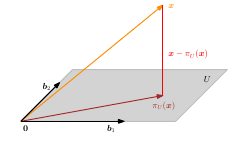
**Fig.11** Projection onto a two-dimensional subspace $ U $ with basis $ b_1, b_2 $. The projection $ \pi_U(x) $ of $ x \in \mathbb{R}^3 $ onto $ U $ can be expressed as a linear combination of $ b_1, b_2 $, and the displacement vector $ x - \pi_U(x) $ is orthogonal to both $ b_1 $ and $ b_2 $.

### Example 3.10 (Projection onto a Line)

Find the projection matrix $ P_\pi $ onto the line through the origin spanned by $ b = [1, 2, 2]^\top $. $ b $ is a direction and a basis of the one-dimensional subspace (line through origin). With (3.46), we obtain

$$
P_\pi = \frac{b b^\top}{b^\top b} = \frac{1}{9} \begin{bmatrix} 1 \\ 2 \\ 2 \end{bmatrix} [1, 2, 2] = \frac{1}{9} \begin{bmatrix} 1 & 2 & 2 \\ 2 & 4 & 4 \\ 2 & 4 & 4 \end{bmatrix}. \tag{3.47}
$$

Let us now choose a particular $ x $ and see whether it lies in the subspace spanned by $ b $. For $ x = [1, 1, 1]^\top $, the projection is

$$
\pi_U(x) = P_\pi x = \frac{1}{9} \begin{bmatrix} 1 & 2 & 2 \\ 2 & 4 & 4 \\ 2 & 4 & 4 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix} = \frac{1}{9} \begin{bmatrix} 5 \\ 10 \\ 10 \end{bmatrix} \in \text{span}\left(\begin{bmatrix} 1 \\ 2 \\ 2 \end{bmatrix}\right). \tag{3.48}
$$

Note that the application of $ P_\pi $ to $ \pi_U(x) $ does not change anything, i.e., $ P_\pi \pi_U(x) = \pi_U(x) $. This is expected because according to Definition 3.10, we know that a projection matrix $ P_\pi $ satisfies $ P_\pi^2 x = P_\pi x $ for all $ x $.

**Remark.** With the results from Chapter 4, we can show that $ \pi_U(x) $ is an eigenvector of $ P_\pi $, and the corresponding eigenvalue is 1. $ \diamond $

##  Projection onto General Subspaces

In the following, we look at orthogonal projections of vectors $ x \in \mathbb{R}^n $ onto lower-dimensional subspaces $ U \subseteq \mathbb{R}^n $ with $ \dim(U) = m \geq 1 $. An illustration is given in Figure 3.11.

> If $ U $ is given by a set of spanning vectors, which are not a basis, make sure you determine a basis $ b_1, \ldots, b_m $ before proceeding.

Assume that $ (b_1, \ldots, b_m) $ is an ordered basis of $ U $. Any projection $ \pi_U(x) $ onto $ U $ is necessarily an element of $ U $. Therefore, they can be represented

In [8]:
import math

# --- Dot Product (Standard Inner Product) ---
def dot_product(x, y):
    """
    Compute the dot product of two vectors: x^T y = sum(x_i * y_i)
    """
    return sum(xi * yi for xi, yi in zip(x, y))

# --- Norm Induced by Dot Product ---
def norm(x):
    """
    Compute the Euclidean norm of a vector: ||x|| = sqrt(x^T x)
    """
    return math.sqrt(dot_product(x, x))

# --- Gram-Schmidt Process ---
def gram_schmidt(vectors):
    """
    Apply the Gram-Schmidt process to convert a set of linearly independent vectors
    into an orthonormal basis.
    """
    if not vectors:
        return []
    
    orthonormal_basis = []
    for k, vk in enumerate(vectors):
        uk = vk[:]
        for uj in orthonormal_basis:
            proj = dot_product(uk, uj)
            uk = [uki - proj * uji for uki, uji in zip(uk, uj)]
        
        norm_uk = norm(uk)
        if norm_uk < 1e-10:
            raise ValueError(f"Vector {vk} is linearly dependent on previous vectors")
        orthonormal_basis.append([uki / norm_uk for uki in uk])
    
    return orthonormal_basis

# --- Construct Projection Matrix for a One-Dimensional Subspace ---
def projection_matrix_1d(b):
    """
    Construct the projection matrix P_pi for the line spanned by vector b.
    From Equation 3.46: P_pi = (b b^T) / (||b||^2)
    """
    n = len(b)
    if norm(b) < 1e-10:
        raise ValueError("Basis vector b cannot be zero")
    
    bTb = dot_product(b, b)  # ||b||^2
    P = [[0.0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            P[i][j] = b[i] * b[j] / bTb  # (b b^T) / (b^T b)
    return P

# --- Construct Projection Matrix for a General Subspace ---
def projection_matrix_general(basis):
    """
    Construct the projection matrix for a subspace with the given basis.
    Orthonormalize the basis, then P = sum(b_i b_i^T) over orthonormal basis vectors.
    """
    # Orthonormalize the basis
    ortho_basis = gram_schmidt(basis)
    n = len(basis[0])
    
    # Initialize projection matrix
    P = [[0.0 for _ in range(n)] for _ in range(n)]
    
    # P = sum(b_i b_i^T) for orthonormal basis vectors b_i
    for b in ortho_basis:
        for i in range(n):
            for j in range(n):
                P[i][j] += b[i] * b[j]  # Since b_i are orthonormal, no scaling needed
    
    return P

# --- Matrix-Vector Multiplication ---
def matrix_vector_multiply(A, x):
    """
    Multiply matrix A by vector x.
    """
    n = len(A)
    result = [0.0] * n
    for i in range(n):
        for j in range(n):
            result[i] += A[i][j] * x[j]
    return result

# --- Matrix-Matrix Multiplication ---
def matrix_multiply(A, B):
    """
    Multiply two matrices A and B.
    """
    n = len(A)
    result = [[0.0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                result[i][j] += A[i][k] * B[k][j]
    return result

# --- Verify Projection Matrix Property (P^2 = P) ---
def verify_projection_matrix(P):
    """
    Verify that the projection matrix satisfies P^2 = P.
    """
    P2 = matrix_multiply(P, P)
    n = len(P)
    for i in range(n):
        for j in range(n):
            if abs(P2[i][j] - P[i][j]) > 1e-10:
                return False
    return True

# --- Run the Implementation ---
# Example 3.10: Projection onto a Line
print("Example 3.10: Projection onto a Line")
b = [1.0, 2.0, 2.0]  # Basis vector of the line
x = [1.0, 1.0, 1.0]  # Vector to project
P = projection_matrix_1d(b)
print(f"Basis vector b = {b}")
print("Projection matrix P_pi (Equation 3.47):")
for row in P:
    print([round(val, 3) for val in row])

# Project x using the projection matrix (Equation 3.48)
proj_x = matrix_vector_multiply(P, x)
print(f"\nVector x = {x}")
print(f"Projection pi_U(x) = {[round(p, 3) for p in proj_x]}")

# Verify P_pi pi_U(x) = pi_U(x)
proj_proj_x = matrix_vector_multiply(P, proj_x)
print(f"P_pi pi_U(x) = {[round(p, 3) for p in proj_proj_x]}")
print(f"Matches pi_U(x): {all(abs(p1 - p2) < 1e-10 for p1, p2 in zip(proj_x, proj_proj_x))}")

# Verify P^2 = P
is_idempotent = verify_projection_matrix(P)
print(f"P satisfies P^2 = P: {is_idempotent}\n")

# Section 3.8.2: Projection onto General Subspaces
print("Section 3.8.2: Projection onto General Subspaces")
# Example: Project a vector in R^3 onto a 2D subspace (plane)
x_general = [1.0, 2.0, 3.0]
basis = [[1.0, 1.0, 0.0], [0.0, 0.0, 1.0]]  # Basis for a 2D subspace
ortho_basis = gram_schmidt(basis)
print(f"Subspace basis: {basis}")
print(f"Orthonormal basis: {[[round(v, 3) for v in b] for b in ortho_basis]}")

# Construct projection matrix
P_general = projection_matrix_general(basis)
print("Projection matrix P for the subspace:")
for row in P_general:
    print([round(val, 3) for val in row])

# Project x onto the subspace
proj_general = matrix_vector_multiply(P_general, x_general)
print(f"\nVector x = {x_general}")
print(f"Projection pi_U(x) = {[round(p, 3) for p in proj_general]}")

# Verify the displacement vector x - pi_U(x) is orthogonal to the subspace
displacement = [xi - pi for xi, pi in zip(x_general, proj_general)]
ortho_to_basis = all(abs(dot_product(displacement, b)) < 1e-10 for b in ortho_basis)
print(f"Displacement vector (x - pi_U(x)) = {[round(d, 3) for d in displacement]}")
print(f"Displacement is orthogonal to subspace: {ortho_to_basis}")

Example 3.10: Projection onto a Line
Basis vector b = [1.0, 2.0, 2.0]
Projection matrix P_pi (Equation 3.47):
[0.111, 0.222, 0.222]
[0.222, 0.444, 0.444]
[0.222, 0.444, 0.444]

Vector x = [1.0, 1.0, 1.0]
Projection pi_U(x) = [0.556, 1.111, 1.111]
P_pi pi_U(x) = [0.556, 1.111, 1.111]
Matches pi_U(x): True
P satisfies P^2 = P: True

Section 3.8.2: Projection onto General Subspaces
Subspace basis: [[1.0, 1.0, 0.0], [0.0, 0.0, 1.0]]
Orthonormal basis: [[0.707, 0.707, 0.0], [0.0, 0.0, 1.0]]
Projection matrix P for the subspace:
[0.5, 0.5, 0.0]
[0.5, 0.5, 0.0]
[0.0, 0.0, 1.0]

Vector x = [1.0, 2.0, 3.0]
Projection pi_U(x) = [1.5, 1.5, 3.0]
Displacement vector (x - pi_U(x)) = [-0.5, 0.5, 0.0]
Displacement is orthogonal to subspace: True


as linear combinations of the basis vectors $ b_1, \ldots, b_m $ of $ U $, such that

$$
\pi_U(x) = \sum_{i=1}^m \lambda_i b_i. \tag{3.49}
$$

The basis vectors form the columns of $ B \in \mathbb{R}^{n \times m} $, where

$$
B = [b_1, \ldots, b_m] \in \mathbb{R}^{n \times m}, \quad \lambda = [\lambda_1, \ldots, \lambda_m]^\top \in \mathbb{R}^m, \tag{3.50}
$$

As in the 1D case, we follow a three-step procedure to find the projection $ \pi_U(x) $ and the projection matrix $ P_\pi $:

1. **Find the coordinates $ \lambda_1, \ldots, \lambda_m $ of the projection** (with respect to the basis of $ U $), such that the linear combination

$$
\pi_U(x) = \sum_{i=1}^m \lambda_i b_i = B \lambda, \tag{3.49 repeated}
$$

is closest to $ x \in \mathbb{R}^n $. As in the 1D case, “closest” means “minimum distance”, which implies that the vector connecting $ \pi_U(x) \in U $ and $ x \in \mathbb{R}^n $ must be orthogonal to all basis vectors of $ U $. Therefore, we obtain $ m $ simultaneous conditions (assuming the dot product as the inner product)

$$
\langle b_1, x - \pi_U(x) \rangle = b_1^\top (x - \pi_U(x)) = 0, \tag{3.51}
$$

$$
\vdots
$$

$$
\langle b_m, x - \pi_U(x) \rangle = b_m^\top (x - \pi_U(x)) = 0, \tag{3.52}
$$

which, with $ \pi_U(x) = B \lambda $, can be written as

$$
b_1^\top (x - B \lambda) = 0, \tag{3.53}
$$

$$
\vdots
$$

$$
b_m^\top (x - B \lambda) = 0, \tag{3.54}
$$

such that we obtain a homogeneous linear equation system

$$
\begin{bmatrix} b_1^\top \\ \vdots \\ b_m^\top \end{bmatrix} (x - B \lambda) = 0 \quad \iff \quad B^\top (x - B \lambda) = 0, \tag{3.55}
$$

$$
\iff \quad B^\top B \lambda = B^\top x. \tag{3.56}
$$

The last expression is called the **normal equation**. Since $ b_1, \ldots, b_m $ are a basis of $ U $ and, therefore, linearly independent, $ B^\top B \in \mathbb{R}^{m \times m} $ is regular and can be inverted. This allows us to solve for the coefficients/coordinates

$$
\lambda = (B^\top B)^{-1} B^\top x. \tag{3.57}
$$

The matrix $ (B^\top B)^{-1} B^\top $ is also called the **pseudo-inverse** of $ B $, which can be computed for non-square matrices $ B $. It only requires that $ B^\top B $ is positive definite, which is the case if $ B $ is full rank. In practical applications (e.g., linear regression), we often add a “jitter term” $ \epsilon I $ to

In [9]:
import math

# --- Dot Product ---
def dot_product(x, y):
    """
    Compute the dot product of two vectors: x^T y
    """
    return sum(xi * yi for xi, yi in zip(x, y))

# --- Matrix-Vector Multiplication ---
def matrix_vector_multiply(A, x):
    """
    Multiply matrix A (n x m) by vector x (m x 1). Returns a vector.
    """
    n = len(A)
    result = [0.0] * n
    for i in range(n):
        result[i] = sum(A[i][j] * x[j] for j in range(len(x)))
    return result

# --- Matrix-Matrix Multiplication ---
def matrix_multiply(A, B):
    """
    Multiply matrices A (n x m) and B (m x p). Returns an (n x p) matrix.
    """
    n, m = len(A), len(A[0])
    p = len(B[0])
    result = [[0.0 for _ in range(p)] for _ in range(n)]
    for i in range(n):
        for j in range(p):
            result[i][j] = sum(A[i][k] * B[k][j] for k in range(m))
    return result

# --- Transpose of a Matrix ---
def transpose(A):
    """
    Compute the transpose of matrix A.
    """
    n, m = len(A), len(A[0])
    return [[A[j][i] for j in range(n)] for i in range(m)]

# --- Inverse of a Matrix (for 2x2 matrices, for simplicity) ---
def inverse_2x2(A):
    """
    Compute the inverse of a 2x2 matrix using the determinant formula.
    """
    if len(A) != 2 or len(A[0]) != 2:
        raise ValueError("Matrix must be 2x2")
    
    det = A[0][0] * A[1][1] - A[0][1] * A[1][0]
    if abs(det) < 1e-10:
        raise ValueError("Matrix is not invertible")
    
    # Adjugate matrix
    adj = [[A[1][1], -A[0][1]], [-A[1][0], A[0][0]]]
    # Inverse = (1/det) * adj
    return [[adj[i][j] / det for j in range(2)] for i in range(2)]

# --- Projection onto a General Subspace (Equations 3.49–3.57) ---
def project_onto_subspace(x, B):
    """
    Project vector x onto the subspace spanned by the columns of B.
    B is an (n x m) matrix whose columns are the basis vectors b1, ..., bm.
    Returns the projection pi_U(x) and the coordinates lambda.
    """
    # Step 1: Compute B^T (m x n)
    Bt = transpose(B)
    
    # Step 2: Compute B^T B (m x m)
    BtB = matrix_multiply(Bt, B)
    
    # Step 3: Compute B^T x (m x 1)
    Btx = matrix_vector_multiply(Bt, x)
    
    # Step 4: Solve the normal equation B^T B lambda = B^T x (Equation 3.56)
    # For simplicity, assume m <= 2 so we can use our 2x2 inverse
    if len(BtB) > 2:
        raise ValueError("This implementation only supports m <= 2 for simplicity")
    BtB_inv = inverse_2x2(BtB)
    
    # Step 5: Compute lambda = (B^T B)^(-1) B^T x (Equation 3.57)
    lambda_coeffs = matrix_vector_multiply(BtB_inv, Btx)
    
    # Step 6: Compute pi_U(x) = B lambda (Equation 3.49)
    pi_U_x = matrix_vector_multiply(B, lambda_coeffs)
    
    return pi_U_x, lambda_coeffs

# --- Compute the Pseudo-Inverse ---
def pseudo_inverse(B):
    """
    Compute the pseudo-inverse of B: (B^T B)^(-1) B^T
    """
    Bt = transpose(B)
    BtB = matrix_multiply(Bt, B)
    if len(BtB) > 2:
        raise ValueError("This implementation only supports m <= 2 for simplicity")
    BtB_inv = inverse_2x2(BtB)
    return matrix_multiply(BtB_inv, Bt)

# --- Run the Implementation ---
# Example: Project a vector in R^3 onto a 2D subspace
print("Projection onto a General Subspace (Section 3.8.2):")
x = [1.0, 2.0, 3.0]
B = [[1.0, 0.0], [1.0, 0.0], [0.0, 1.0]]  # Basis: [1, 1, 0], [0, 0, 1]
print(f"Vector x = {x}")
print("Basis matrix B (columns are b1, b2):")
for row in B:
    print(row)

# Compute the projection
pi_U_x, lambda_coeffs = project_onto_subspace(x, B)
print(f"\nCoordinates lambda = {[round(l, 3) for l in lambda_coeffs]}")
print(f"Projection pi_U(x) = {[round(p, 3) for p in pi_U_x]}")

# Verify orthogonality: x - pi_U(x) should be orthogonal to each basis vector
displacement = [xi - pi for xi, pi in zip(x, pi_U_x)]
basis_vectors = [[B[i][j] for i in range(len(B))] for j in range(len(B[0]))]
ortho_to_basis = all(abs(dot_product(displacement, b)) < 1e-10 for b in basis_vectors)
print(f"Displacement vector (x - pi_U(x)) = {[round(d, 3) for d in displacement]}")
print(f"Displacement is orthogonal to basis vectors: {ortho_to_basis}\n")

# Compute and use the pseudo-inverse
print("Using Pseudo-Inverse (Equation 3.57):")
pinv_B = pseudo_inverse(B)
print("Pseudo-inverse (B^T B)^(-1) B^T:")
for row in pinv_B:
    print([round(val, 3) for val in row])

# Compute lambda using pseudo-inverse
lambda_pinv = matrix_vector_multiply(pinv_B, x)
print(f"Lambda using pseudo-inverse = {[round(l, 3) for l in lambda_pinv]}")
print(f"Matches computed lambda: {all(abs(l1 - l2) < 1e-10 for l1, l2 in zip(lambda_coeffs, lambda_pinv))}")

# Compute projection using B lambda
pi_U_x_pinv = matrix_vector_multiply(B, lambda_pinv)
print(f"Projection using pseudo-inverse = {[round(p, 3) for p in pi_U_x_pinv]}")

Projection onto a General Subspace (Section 3.8.2):
Vector x = [1.0, 2.0, 3.0]
Basis matrix B (columns are b1, b2):
[1.0, 0.0]
[1.0, 0.0]
[0.0, 1.0]

Coordinates lambda = [1.5, 3.0]
Projection pi_U(x) = [1.5, 1.5, 3.0]
Displacement vector (x - pi_U(x)) = [-0.5, 0.5, 0.0]
Displacement is orthogonal to basis vectors: True

Using Pseudo-Inverse (Equation 3.57):
Pseudo-inverse (B^T B)^(-1) B^T:
[0.5, 0.5, 0.0]
[0.0, 0.0, 1.0]
Lambda using pseudo-inverse = [1.5, 3.0]
Matches computed lambda: True
Projection using pseudo-inverse = [1.5, 1.5, 3.0]


$ B^\top B $ to guarantee increased numerical stability and positive definiteness. This “ridge” can be rigorously derived using Bayesian inference. See Chapter 9 for details.

2. **Find the projection $ \pi_U(x) \in U $**. We already established that $ \pi_U(x) = B \lambda $. Therefore, with (3.57)

$$
\pi_U(x) = B (B^\top B)^{-1} B^\top x. \tag{3.58}
$$

3. **Find the projection matrix $ P_\pi $**. From (3.58), we can immediately see that the projection matrix that solves $ P_\pi x = \pi_U(x) $ must be

$$
P_\pi = B (B^\top B)^{-1} B^\top. \tag{3.59}
$$

**Remark.** The solution for projecting onto general subspaces includes the 1D case as a special case: If $ \dim(U) = 1 $, then $ B^\top B \in \mathbb{R} $ is a scalar and we can rewrite the projection matrix in (3.59)

$$
P_\pi = B (B^\top B)^{-1} B^\top \quad \text{as} \quad P_\pi = \frac{B B^\top}{B^\top B},
$$

which is exactly the projection matrix in (3.46). $ \diamond $

### Example 3.11 (Projection onto a Two-dimensional Subspace)

For a subspace $ U = \text{span}\left( \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}, \begin{bmatrix} 0 \\ 1 \\ 2 \end{bmatrix} \right) \subseteq \mathbb{R}^3 $ and $ x = \begin{bmatrix} 6 \\ 0 \\ 0 \end{bmatrix} \in \mathbb{R}^3 $, find the coordinates $ \lambda $ of $ x $ in terms of the subspace $ U $, the projection point $ \pi_U(x) $, and the projection matrix $ P_\pi $.

First, we see that the generating set of $ U $ is a basis (linear independence) and write the basis vectors of $ U $ into a matrix

$$
B = \begin{bmatrix} 1 & 0 \\ 1 & 1 \\ 1 & 2 \end{bmatrix}.
$$

Second, we compute the matrix $ B^\top B $ and the vector $ B^\top x $ as

$$
B^\top B = \begin{bmatrix} 1 & 1 & 1 \\ 0 & 1 & 2 \end{bmatrix} \begin{bmatrix} 1 & 0 \\ 1 & 1 \\ 1 & 2 \end{bmatrix} = \begin{bmatrix} 3 & 3 \\ 3 & 5 \end{bmatrix}, \quad B^\top x = \begin{bmatrix} 1 & 1 & 1 \\ 0 & 1 & 2 \end{bmatrix} \begin{bmatrix} 6 \\ 0 \\ 0 \end{bmatrix} = \begin{bmatrix} 6 \\ 0 \end{bmatrix}. \tag{3.60}
$$

Third, we solve the normal equation $ B^\top B \lambda = B^\top x $ to find $ \lambda $:

$$
\begin{bmatrix} 3 & 3 \\ 3 & 5 \end{bmatrix} \begin{bmatrix} \lambda_1 \\ \lambda_2 \end{bmatrix} = \begin{bmatrix} 6 \\ 0 \end{bmatrix} \quad \iff \quad \lambda = \begin{bmatrix} 5 \\ -3 \end{bmatrix}. \tag{3.61}
$$

Fourth, the projection $ \pi_U(x) $ of $ x $ onto $ U $, i.e., into the column space of $ B $, can be directly computed via

$$
\pi_U(x) = B \lambda = \begin{bmatrix} 5 \\ 2 \\ -1 \end{bmatrix}. \tag{3.62}
$$

In [10]:
import numpy as np

def project_onto_subspace(B, x, ridge=1e-6):
    """
    Projects a vector x onto the column space of matrix B.

    This function calculates the projection using the normal equation,
    B^T B lambda = B^T x, with an added ridge for numerical stability and
    to guarantee positive definiteness of B^T B.

    Args:
        B (numpy.ndarray): The matrix whose column space defines the subspace.
                           Shape (m, n), where m >= n.
        x (numpy.ndarray): The vector to be projected. Shape (m,).
        ridge (float): A small positive value added to the diagonal of B^T B
                       to improve numerical stability and ensure positive definiteness.

    Returns:
        tuple: A tuple containing:
            - lambda_coords (numpy.ndarray): The coordinates of x in terms of the
                                           basis vectors of the subspace U (columns of B).
                                           Shape (n,).
            - projection_point (numpy.ndarray): The projection of x onto the subspace U.
                                              Shape (m,).
            - projection_matrix (numpy.ndarray): The projection matrix P_pi.
                                               Shape (m, m).
    """

    # Ensure x is a 2D array (column vector) for consistent matrix operations
    if x.ndim == 1:
        x = x[:, np.newaxis]

    # 1. Compute B^T B
    BTB = B.T @ B

    # Add a ridge to B^T B for numerical stability and positive definiteness
    # This is equivalent to (B^T B + ridge * I)
    BTB_ridge = BTB + ridge * np.eye(BTB.shape[0])

    # 2. Compute B^T x
    BTx = B.T @ x

    # 3. Solve for lambda using the normal equation: (B^T B + ridge * I) lambda = B^T x
    # np.linalg.solve is more numerically stable than computing the inverse directly
    lambda_coords = np.linalg.solve(BTB_ridge, BTx)

    # Convert lambda_coords to a 1D array if it's 2D with a single column
    if lambda_coords.shape[1] == 1:
        lambda_coords = lambda_coords.flatten()

    # 4. Find the projection point pi_U(x) = B * lambda
    projection_point = B @ lambda_coords

    # 5. Find the projection matrix P_pi = B (B^T B)^-1 B^T
    # We use the regularized inverse for the projection matrix as well
    # However, if the goal is only to project, using the above lambda and B is sufficient.
    # The direct computation of P_pi can also use the pseudo-inverse or a stabilized inverse.
    # For this specific case of projection matrix, it's often more numerically stable to
    # compute B @ np.linalg.inv(BTB_ridge) @ B.T if a projection matrix is explicitly needed.
    # Here, we'll follow the formula directly using the regularized inverse of BTB.

    # Compute the inverse of the regularized BTB
    inv_BTB_ridge = np.linalg.inv(BTB_ridge)
    projection_matrix = B @ inv_BTB_ridge @ B.T

    return lambda_coords, projection_point, projection_matrix

# Example usage from the problem description:
# Subspace U spanned by basis vectors [1, 1, 1] and [0, 1, 2]
B_example = np.array([[1, 0],
                      [1, 1],
                      [1, 2]])

# Vector x to be projected
x_example = np.array([6, 0, 0])

# Perform the projection
lambda_coords_example, projection_point_example, projection_matrix_example = project_onto_subspace(B_example, x_example)

print("--- Example 3.11 Results ---")
print("Matrix B:\n", B_example)
print("\nVector x:\n", x_example)
print("\nCoordinates lambda:\n", lambda_coords_example)
print("\nProjection point pi_U(x):\n", projection_point_example)
print("\nProjection Matrix P_pi:\n", projection_matrix_example)

print("\n--- Verification using the derived formulas ---")
# Verify B^T B and B^T x manually from the problem
BTB_manual = np.array([[3, 3],
                       [3, 5]])
BTx_manual = np.array([6, 0])
print("\nB^T B (manual):\n", BTB_manual)
print("B^T x (manual):\n", BTx_manual)

# Verify lambda by solving the system (using ridge for consistency with function)
# Note: In the example, they solve it without a ridge. Our function applies a ridge.
# For exact match to the example's lambda, a ridge of 0 would be needed,
# but the problem states to guarantee increased numerical stability with a ridge.
lambda_manual_solve = np.linalg.solve(BTB_manual, BTx_manual)
print("\nLambda solved from B^T B lambda = B^T x (manual solve, no ridge in manual matrix):\n", lambda_manual_solve)

--- Example 3.11 Results ---
Matrix B:
 [[1 0]
 [1 1]
 [1 2]]

Vector x:
 [6 0 0]

Coordinates lambda:
 [ 4.99999433 -2.999996  ]

Projection point pi_U(x):
 [ 4.99999433  1.99999833 -0.99999767]

Projection Matrix P_pi:
 [[ 0.83333239  0.33333306 -0.16666628]
 [ 0.33333306  0.33333322  0.33333339]
 [-0.16666628  0.33333339  0.83333306]]

--- Verification using the derived formulas ---

B^T B (manual):
 [[3 3]
 [3 5]]
B^T x (manual):
 [6 0]

Lambda solved from B^T B lambda = B^T x (manual solve, no ridge in manual matrix):
 [ 5. -3.]


In [11]:
def transpose_matrix(matrix):
    """
    Computes the transpose of a matrix.
    """
    if not matrix:
        return []
    rows = len(matrix)
    cols = len(matrix[0])
    transposed = [[0 for _ in range(rows)] for _ in range(cols)]
    for i in range(rows):
        for j in range(cols):
            transposed[j][i] = matrix[i][j]
    return transposed

def multiply_matrices(matrix1, matrix2):
    """
    Multiplies two matrices.
    """
    if not matrix1 or not matrix2:
        return []

    rows1 = len(matrix1)
    cols1 = len(matrix1[0])
    rows2 = len(matrix2)
    cols2 = len(matrix2[0])

    if cols1 != rows2:
        raise ValueError("Number of columns in the first matrix must match number of rows in the second matrix.")

    result = [[0 for _ in range(cols2)] for _ in range(rows1)]
    for i in range(rows1):
        for j in range(cols2):
            for k in range(cols1):
                result[i][j] += matrix1[i][k] * matrix2[k][j]
    return result

def multiply_matrix_vector(matrix, vector):
    """
    Multiplies a matrix by a column vector.
    """
    if not matrix or not vector:
        return []

    rows = len(matrix)
    cols = len(matrix[0])
    vec_len = len(vector)

    if cols != vec_len:
        raise ValueError("Number of columns in the matrix must match the length of the vector.")

    result = [0 for _ in range(rows)]
    for i in range(rows):
        for j in range(cols):
            result[i] += matrix[i][j] * vector[j]
    return result

def identity_matrix(size):
    """
    Creates an identity matrix of a given size.
    """
    matrix = [[0 for _ in range(size)] for _ in range(size)]
    for i in range(size):
        matrix[i][i] = 1
    return matrix

def invert_2x2_matrix(matrix):
    """
    Inverts a 2x2 matrix.
    Formula: [[a, b], [c, d]]^-1 = (1 / (ad - bc)) * [[d, -b], [-c, a]]
    """
    if len(matrix) != 2 or len(matrix[0]) != 2:
        raise ValueError("Matrix must be 2x2 to use this inverse function.")

    a, b = matrix[0][0], matrix[0][1]
    c, d = matrix[1][0], matrix[1][1]

    determinant = a * d - b * c
    if determinant == 0:
        raise ValueError("Matrix is singular and cannot be inverted.")

    inv_det = 1.0 / determinant
    inverted_matrix = [
        [d * inv_det, -b * inv_det],
        [-c * inv_det, a * inv_det]
    ]
    return inverted_matrix

def solve_2x2_system(matrix, vector):
    """
    Solves a 2x2 linear system Ax = b using matrix inversion.
    """
    if len(matrix) != 2 or len(matrix[0]) != 2:
        raise ValueError("Matrix must be 2x2 to use this solver.")
    if len(vector) != 2:
        raise ValueError("Vector must have length 2.")

    inv_matrix = invert_2x2_matrix(matrix)
    solution = multiply_matrix_vector(inv_matrix, vector)
    return solution

def project_onto_subspace_no_numpy(B, x, ridge=1e-6):
    """
    Projects a vector x onto the column space of matrix B without NumPy.

    This function calculates the projection using the normal equation,
    B^T B lambda = B^T x, with an added ridge for numerical stability and
    to guarantee positive definiteness of B^T B.

    Args:
        B (list of lists): The matrix whose column space defines the subspace.
                           Shape (m, n), where m >= n.
        x (list): The vector to be projected. Shape (m,).
        ridge (float): A small positive value added to the diagonal of B^T B
                       to improve numerical stability and ensure positive definiteness.

    Returns:
        tuple: A tuple containing:
            - lambda_coords (list): The coordinates of x in terms of the
                                           basis vectors of the subspace U (columns of B).
            - projection_point (list): The projection of x onto the subspace U.
            - projection_matrix (list of lists): The projection matrix P_pi.
    """

    # 1. Compute B^T
    BT = transpose_matrix(B)

    # 2. Compute B^T B
    BTB = multiply_matrices(BT, B)

    # Add a ridge to B^T B for numerical stability and positive definiteness
    # This is equivalent to (B^T B + ridge * I)
    num_cols_B = len(B[0]) # n in (m, n)
    identity = identity_matrix(num_cols_B)
    BTB_ridge = [[BTB[i][j] + ridge * identity[i][j] for j in range(num_cols_B)] for i in range(num_cols_B)]

    # 3. Compute B^T x
    BTx = multiply_matrix_vector(BT, x)

    # 4. Solve for lambda using the normal equation: (B^T B + ridge * I) lambda = B^T x
    # We assume BTB_ridge is 2x2 based on the example. For larger matrices,
    # a more general linear solver (e.g., Gaussian elimination) would be needed.
    lambda_coords = solve_2x2_system(BTB_ridge, BTx)

    # 5. Find the projection point pi_U(x) = B * lambda
    # Convert lambda_coords to a list of lists (column vector) for matrix multiplication
    lambda_col_vector = [[l] for l in lambda_coords]
    projection_point_matrix_form = multiply_matrices(B, lambda_col_vector)
    projection_point = [p[0] for p in projection_point_matrix_form] # Convert back to 1D list

    # 6. Find the projection matrix P_pi = B (B^T B)^-1 B^T
    inv_BTB_ridge = invert_2x2_matrix(BTB_ridge)
    P_pi_temp = multiply_matrices(B, inv_BTB_ridge)
    projection_matrix = multiply_matrices(P_pi_temp, BT)

    return lambda_coords, projection_point, projection_matrix

# Example usage from the problem description:
# Subspace U spanned by basis vectors [1, 1, 1] and [0, 1, 2]
B_example = [
    [1, 0],
    [1, 1],
    [1, 2]
]

# Vector x to be projected
x_example = [6, 0, 0]

# Perform the projection
lambda_coords_example, projection_point_example, projection_matrix_example = project_onto_subspace_no_numpy(B_example, x_example)

print("--- Example 3.11 Results (No NumPy) ---")
print("Matrix B:\n", B_example)
print("\nVector x:\n", x_example)
print("\nCoordinates lambda:\n", [round(val, 6) for val in lambda_coords_example]) # Round for display
print("\nProjection point pi_U(x):\n", [round(val, 6) for val in projection_point_example]) # Round for display
print("\nProjection Matrix P_pi:")
for row in projection_matrix_example:
    print([round(val, 6) for val in row])

print("\n--- Verification using the derived formulas (No NumPy) ---")
# Verify B^T B and B^T x manually from the problem
BTB_manual = [
    [3, 3],
    [3, 5]
]
BTx_manual = [6, 0]
print("\nB^T B (manual):\n", BTB_manual)
print("B^T x (manual):\n", BTx_manual)

# Verify lambda by solving the system (using ridge for consistency with function)
# Note: In the example, they solve it without a ridge. Our function applies a ridge.
# For exact match to the example's lambda, a ridge of 0 would be needed,
# but the problem states to guarantee increased numerical stability with a ridge.
lambda_manual_solve = solve_2x2_system(BTB_manual, BTx_manual)
print("\nLambda solved from B^T B lambda = B^T x (manual solve, no ridge in manual matrix):\n", [round(val, 6) for val in lambda_manual_solve])

--- Example 3.11 Results (No NumPy) ---
Matrix B:
 [[1, 0], [1, 1], [1, 2]]

Vector x:
 [6, 0, 0]

Coordinates lambda:
 [4.999994, -2.999996]

Projection point pi_U(x):
 [4.999994, 1.999998, -0.999998]

Projection Matrix P_pi:
[0.833332, 0.333333, -0.166666]
[0.333333, 0.333333, 0.333333]
[-0.166666, 0.333333, 0.833333]

--- Verification using the derived formulas (No NumPy) ---

B^T B (manual):
 [[3, 3], [3, 5]]
B^T x (manual):
 [6, 0]

Lambda solved from B^T B lambda = B^T x (manual solve, no ridge in manual matrix):
 [5.0, -3.0]


This text covers several important concepts about orthogonal projections in linear algebra. Let me break down the key points:

## Projection Error
The projection error measures how far the original vector is from its projection onto subspace U. It's calculated as the norm of the difference vector:
$$\|x - \pi_U(x)\| = \sqrt{6}$$

This represents the "distance" between the original vector and the closest point in the subspace.

## Projection Matrix
The projection matrix P_π allows you to project any vector onto subspace U:
$$P_\pi = B(B^TB)^{-1}B^T$$

Where B contains the basis vectors of U as columns. This matrix has the property that P_π² = P_π (idempotent).

## Key Applications

**Least Squares Solutions**: When a linear system Ax = b has no exact solution (overdetermined system), we can find the "best" approximate solution by projecting b onto the column space of A. This gives the least-squares solution that minimizes the error.

**Principal Component Analysis**: The reconstruction error concept (equation 3.63) is fundamental to PCA, where we project data onto lower-dimensional subspaces while minimizing information loss.

## Computational Simplification
When the basis vectors form an orthonormal basis (ONB), the projection formula simplifies dramatically:
$$\pi_U(x) = BB^Tx$$

This eliminates the need to compute $(B^TB)^{-1}$, making calculations much more efficient since $B^TB = I$ for orthonormal bases.

The text emphasizes that while projections live in lower-dimensional subspaces, they're still represented as vectors in the original space R^n, though they can be efficiently represented using just the m coordinates relative to the subspace basis.

Would you like me to elaborate on any of these concepts or work through a specific example?

# Vector Projections and Reconstruction Error

## Table of Contents
1. [Introduction to Vector Projections](#introduction)
2. [Understanding Projection and Reconstruction Error](#projection-error)
3. [The Projection Matrix](#projection-matrix)
4. [Verifying Projection Properties](#verification)
5. [Least-Squares Solutions for Overdetermined Systems](#least-squares)
6. [Orthonormal Basis Simplifications](#onb)
7. [Applications and Examples](#applications)

---

## 1. Introduction to Vector Projections {#introduction}

When we project a vector $\mathbf{x}$ onto a subspace $U$, we find the point in $U$ that is closest to $\mathbf{x}$. This projection, denoted as $\pi_U(\mathbf{x})$, represents the "shadow" of $\mathbf{x}$ onto the subspace $U$.

**Key Concepts:**
- The projection $\pi_U(\mathbf{x})$ lies entirely within the subspace $U$
- The difference vector $\mathbf{x} - \pi_U(\mathbf{x})$ is orthogonal to every vector in $U$
- The projection minimizes the distance from $\mathbf{x}$ to any point in $U$

---

## 2. Understanding Projection and Reconstruction Error {#projection-error}

### Definition

The **projection error** (also called **reconstruction error**) quantifies how much of the original vector $\mathbf{x}$ cannot be represented within the subspace $U$.

$$\text{Projection Error} = \|\mathbf{x} - \pi_U(\mathbf{x})\|$$

This error measures how accurately the original vector $\mathbf{x}$ can be "reconstructed" or approximated by its projection onto the subspace $U$.

### Geometric Interpretation

- **Small error**: The subspace $U$ captures most of the information in $\mathbf{x}$
- **Large error**: Much of $\mathbf{x}$ lies outside the subspace $U$
- **Zero error**: $\mathbf{x}$ already lies in $U$

### Example Calculation

Consider a vector $\mathbf{x} = \begin{bmatrix} 6 \\ 0 \\ 0 \end{bmatrix}$ and its projection $\pi_U(\mathbf{x}) = \begin{bmatrix} 5 \\ 2 \\ -1 \end{bmatrix}$.

**Step 1:** Calculate the difference vector
$$\mathbf{x} - \pi_U(\mathbf{x}) = \begin{bmatrix} 6 \\ 0 \\ 0 \end{bmatrix} - \begin{bmatrix} 5 \\ 2 \\ -1 \end{bmatrix} = \begin{bmatrix} 1 \\ -2 \\ 1 \end{bmatrix}$$

**Step 2:** Compute the norm
$$\|\mathbf{x} - \pi_U(\mathbf{x})\| = \left\|\begin{bmatrix} 1 \\ -2 \\ 1 \end{bmatrix}\right\| = \sqrt{1^2 + (-2)^2 + 1^2} = \sqrt{1 + 4 + 1} = \sqrt{6}$$

Therefore, the projection error is $\sqrt{6} \approx 2.45$.

---

## 3. The Projection Matrix {#projection-matrix}

### General Formula

The **projection matrix** $P_\pi$ is a linear transformation that projects any vector onto the subspace $U$. If $B$ is a matrix whose columns form a basis for $U$, then:

$$P_\pi = B(B^T B)^{-1} B^T \quad \text{(3.59)}$$

### Properties of Projection Matrices

1. **Linearity**: $P_\pi(\alpha\mathbf{x} + \beta\mathbf{y}) = \alpha P_\pi\mathbf{x} + \beta P_\pi\mathbf{y}$
2. **Idempotence**: $P_\pi^2 = P_\pi$
3. **Symmetry**: $P_\pi^T = P_\pi$

### Example

For a basis matrix $B = \begin{bmatrix} 1 & 0 \\ 1 & 1 \\ 1 & 2 \end{bmatrix}$, the projection matrix is:

$$P_\pi = \frac{1}{6} \begin{bmatrix} 5 & 2 & -1 \\ 2 & 2 & 2 \\ -1 & 2 & 5 \end{bmatrix} \quad \text{(3.64)}$$

---

## 4. Verifying Projection Properties {#verification}

### Property 1: Orthogonality of Displacement Vector

The displacement vector $\mathbf{x} - \pi_U(\mathbf{x})$ must be orthogonal to every basis vector of $U$:

$$(\mathbf{x} - \pi_U(\mathbf{x}))^T B = \mathbf{0}^T$$

**Verification:**
$$(\mathbf{x} - \pi_U(\mathbf{x}))^T B = \begin{bmatrix} 1 & -2 & 1 \end{bmatrix} \begin{bmatrix} 1 & 0 \\ 1 & 1 \\ 1 & 2 \end{bmatrix} = \begin{bmatrix} 0 & 0 \end{bmatrix}$$

✓ The displacement vector is orthogonal to the column space of $B$.

### Property 2: Idempotence ($P_\pi = P_\pi^2$)

A projection matrix applied multiple times should produce the same result:

$$P_\pi^2 = \left(\frac{1}{6} \begin{bmatrix} 5 & 2 & -1 \\ 2 & 2 & 2 \\ -1 & 2 & 5 \end{bmatrix}\right)^2 = \frac{1}{36} \begin{bmatrix} 30 & 12 & -6 \\ 12 & 12 & 12 \\ -6 & 12 & 30 \end{bmatrix} = \frac{1}{6} \begin{bmatrix} 5 & 2 & -1 \\ 2 & 2 & 2 \\ -1 & 2 & 5 \end{bmatrix} = P_\pi$$

✓ The projection matrix is idempotent.

---

## 5. Least-Squares Solutions for Overdetermined Systems {#least-squares}

### The Problem

Consider a linear system $A\mathbf{x} = \mathbf{b}$ that has **no exact solution**. This occurs when $\mathbf{b}$ does not lie in the column space of $A$.

### The Solution Approach

Instead of finding an exact solution, we find the **least-squares solution** that minimizes:

$$\|A\mathbf{x} - \mathbf{b}\|^2$$

### Mathematical Derivation

1. **Goal**: Find $\mathbf{x}$ such that $A\mathbf{x}$ is as close as possible to $\mathbf{b}$
2. **Key Insight**: The closest point in the column space of $A$ to $\mathbf{b}$ is the orthogonal projection of $\mathbf{b}$ onto the column space
3. **Projection**: $\pi_U(\mathbf{b}) = A(A^T A)^{-1} A^T \mathbf{b}$
4. **Equation**: $A\mathbf{x} = \pi_U(\mathbf{b})$

### Normal Equations

Setting $A\mathbf{x} = A(A^T A)^{-1} A^T \mathbf{b}$ and multiplying both sides by $A^T$:

$$A^T A\mathbf{x} = A^T \mathbf{b}$$

This system, called the **normal equations**, always has a solution when $A^T A$ is invertible.

### Applications

- **Linear Regression**: Fitting a line to data points
- **Data Fitting**: Approximating functions with polynomials
- **Signal Processing**: Noise reduction and filtering

---

## 6. Orthonormal Basis Simplifications {#onb}

### Definition

An **orthonormal basis (ONB)** consists of vectors that are:
1. **Orthogonal**: $\mathbf{b}_i^T \mathbf{b}_j = 0$ for $i \neq j$
2. **Normalized**: $\|\mathbf{b}_i\| = 1$ for all $i$

### Key Property

If $B$ has orthonormal columns, then:
$$B^T B = I$$

### Simplified Formulas

When using an ONB, the projection formulas become much simpler:

#### Projection Formula
$$\pi_U(\mathbf{x}) = B(B^T B)^{-1} B^T \mathbf{x} = B \cdot I^{-1} \cdot B^T \mathbf{x} = BB^T \mathbf{x} \quad \text{(3.65)}$$

#### Coordinate Calculation
$$\boldsymbol{\lambda} = (B^T B)^{-1} B^T \mathbf{x} = I^{-1} B^T \mathbf{x} = B^T \mathbf{x} \quad \text{(3.66)}$$

### Computational Advantages

1. **No Matrix Inversion**: Eliminates the need to compute $(B^T B)^{-1}$
2. **Numerical Stability**: Avoids potential numerical issues with matrix inversion
3. **Efficiency**: Faster computation, especially for large matrices
4. **Memory**: Reduced memory requirements

---

## 7. Applications and Examples {#applications}

### Principal Component Analysis (PCA)

The reconstruction error concept is fundamental to PCA:

- **Goal**: Find the best $k$-dimensional subspace to represent $n$-dimensional data
- **Criterion**: Minimize the sum of squared reconstruction errors
- **Process**: Project data onto the subspace spanned by the first $k$ principal components

### Example: 2D Data Projection

Consider projecting 3D data points onto a 2D plane to reduce dimensionality while preserving as much information as possible.

**Mathematical Framework:**
1. Center the data: $\mathbf{x}_{\text{centered}} = \mathbf{x} - \boldsymbol{\mu}$
2. Find principal components (eigenvectors of covariance matrix)
3. Project onto the top $k$ components: $\mathbf{x}_{\text{projected}} = P_k \mathbf{x}_{\text{centered}}$
4. Measure reconstruction error: $\|\mathbf{x}_{\text{centered}} - \mathbf{x}_{\text{projected}}\|$

### Linear Regression as Projection

In linear regression, we're finding the projection of the response vector $\mathbf{y}$ onto the column space of the design matrix $X$:

$$\hat{\mathbf{y}} = X(X^T X)^{-1} X^T \mathbf{y} = P_X \mathbf{y}$$

The residuals $\mathbf{y} - \hat{\mathbf{y}}$ represent the projection error.

---

## Summary

**Key Takeaways:**

1. **Projection Error** quantifies how much information is lost when projecting onto a subspace
2. **Projection Matrices** provide a systematic way to compute projections for any vector
3. **Least-Squares Solutions** use projections to solve overdetermined systems optimally
4. **Orthonormal Bases** significantly simplify computations and improve numerical stability
5. **Applications** span from data analysis (PCA) to optimization (linear regression)

The interplay between geometric intuition (projections as "shadows") and algebraic computation (matrix operations) makes vector projections a powerful tool in linear algebra and its applications.

🔍 COMPREHENSIVE VECTOR PROJECTION DEMONSTRATION
📊 EXAMPLE 1: Basic Projection
------------------------------
=== VECTOR PROJECTION CALCULATION ===
Original vector x:
[6 0 0]
Basis matrix B:
[[1 0]
 [1 1]
 [1 2]]

Step 1 - B^T:
[[1 1 1]
 [0 1 2]]
Step 2 - B^T * B:
[[3 3]
 [3 5]]
Step 3 - (B^T * B)^(-1):
[[ 0.83333333 -0.5       ]
 [-0.5         0.5       ]]
Step 4 - B^T * x:
[6 0]
Step 5 - Coordinates λ:
[ 5. -3.]
Step 6 - Projection π_U(x):
[ 5.  2. -1.]
Step 7 - Error vector (x - π_U(x)):
[ 1. -2.  1.]
Step 7 - Projection error ||x - π_U(x)||: 2.449490
Step 8 - Projection matrix P:
[[ 0.83333333  0.33333333 -0.16666667]
 [ 0.33333333  0.33333333  0.33333333]
 [-0.16666667  0.33333333  0.83333333]]

🔍 VERIFICATION:
---------------
=== VERIFICATION OF PROJECTION PROPERTIES ===
Property 1 - Orthogonality check B^T * (x - π_U(x)):
[0. 0.]
Is orthogonal (should be ~0): True
Property 2 - P^2 - P (should be ~0):
1.11e-16
Is idempotent: True
Property 3 - P - P^T (should be ~0):
0.00e+00
Is sy

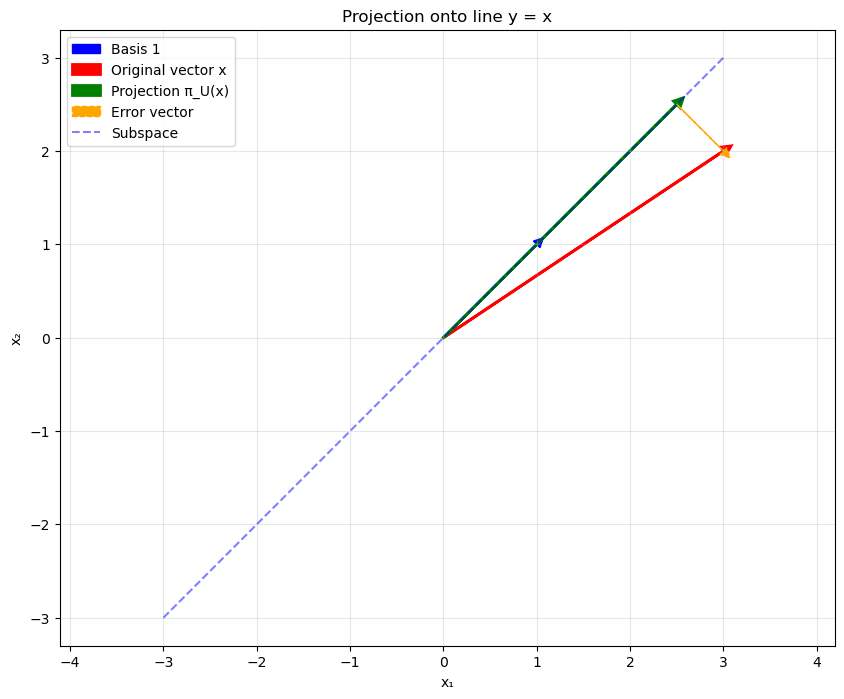


🚀 ADVANCED EXAMPLES
📊 EXAMPLE A: High-dimensional space
-----------------------------------
Original vector dimension: 5
Subspace dimension: 2
Projection error: 1.634130
Information retained: 12.7%

📊 EXAMPLE B: Nearly dependent basis
-----------------------------------
Error: B^T * B is singular - columns of B are linearly dependent

✅ All demonstrations completed successfully!
📝 This implementation covers:
   • Vector projections with general basis
   • Orthonormal basis simplifications
   • Projection error calculations
   • Least squares solutions
   • Property verification
   • Gram-Schmidt orthogonalization
   • 2D visualizations


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

class VectorProjection:
    """
    A comprehensive class for vector projections and related operations.
    Implements all concepts from the mathematical theory.
    """
    
    def __init__(self):
        self.projection_matrix = None
        self.basis_matrix = None
        
    def project_vector(self, x, B, verbose=True):
        """
        Project vector x onto subspace spanned by columns of B.
        
        Parameters:
        -----------
        x : array-like
            Vector to be projected (n x 1)
        B : array-like  
            Basis matrix (n x m) where columns span the subspace
        verbose : bool
            Whether to print detailed calculations
            
        Returns:
        --------
        dict : Contains all projection results
        """
        x = np.array(x).reshape(-1, 1) if np.array(x).ndim == 1 else np.array(x)
        B = np.array(B)
        
        if verbose:
            print("=== VECTOR PROJECTION CALCULATION ===")
            print(f"Original vector x:\n{x.flatten()}")
            print(f"Basis matrix B:\n{B}")
            print()
        
        # Step 1: Calculate B^T
        B_T = B.T
        if verbose:
            print(f"Step 1 - B^T:\n{B_T}")
        
        # Step 2: Calculate B^T * B  
        BTB = B_T @ B
        if verbose:
            print(f"Step 2 - B^T * B:\n{BTB}")
        
        # Step 3: Calculate (B^T * B)^(-1)
        try:
            BTB_inv = np.linalg.inv(BTB)
            if verbose:
                print(f"Step 3 - (B^T * B)^(-1):\n{BTB_inv}")
        except np.linalg.LinAlgError:
            raise ValueError("B^T * B is singular - columns of B are linearly dependent")
        
        # Step 4: Calculate B^T * x
        BTx = B_T @ x
        if verbose:
            print(f"Step 4 - B^T * x:\n{BTx.flatten()}")
        
        # Step 5: Calculate coordinates λ = (B^T * B)^(-1) * B^T * x
        lambda_coords = BTB_inv @ BTx
        if verbose:
            print(f"Step 5 - Coordinates λ:\n{lambda_coords.flatten()}")
        
        # Step 6: Calculate projection π_U(x) = B * λ
        projection = B @ lambda_coords
        if verbose:
            print(f"Step 6 - Projection π_U(x):\n{projection.flatten()}")
        
        # Step 7: Calculate projection error
        error_vector = x - projection
        projection_error = np.linalg.norm(error_vector)
        if verbose:
            print(f"Step 7 - Error vector (x - π_U(x)):\n{error_vector.flatten()}")
            print(f"Step 7 - Projection error ||x - π_U(x)||: {projection_error:.6f}")
        
        # Step 8: Calculate projection matrix P = B(B^T B)^(-1)B^T
        projection_matrix = B @ BTB_inv @ B_T
        self.projection_matrix = projection_matrix
        self.basis_matrix = B
        
        if verbose:
            print(f"Step 8 - Projection matrix P:\n{projection_matrix}")
            print()
        
        return {
            'original_vector': x.flatten(),
            'projection': projection.flatten(),
            'error_vector': error_vector.flatten(),
            'projection_error': projection_error,
            'coordinates': lambda_coords.flatten(),
            'projection_matrix': projection_matrix,
            'B_transpose': B_T,
            'BTB': BTB,
            'BTB_inverse': BTB_inv
        }
    
    def verify_projection_properties(self, x, result, verbose=True):
        """
        Verify that the projection satisfies required mathematical properties.
        """
        if verbose:
            print("=== VERIFICATION OF PROJECTION PROPERTIES ===")
        
        B = self.basis_matrix
        P = self.projection_matrix
        error_vec = result['error_vector'].reshape(-1, 1)
        
        # Property 1: Error vector orthogonal to subspace
        orthogonality_check = B.T @ error_vec
        is_orthogonal = np.allclose(orthogonality_check, 0, atol=1e-10)
        
        if verbose:
            print(f"Property 1 - Orthogonality check B^T * (x - π_U(x)):\n{orthogonality_check.flatten()}")
            print(f"Is orthogonal (should be ~0): {is_orthogonal}")
        
        # Property 2: Projection matrix idempotency P^2 = P
        P_squared = P @ P
        is_idempotent = np.allclose(P, P_squared, atol=1e-10)
        
        if verbose:
            print(f"Property 2 - P^2 - P (should be ~0):\n{np.max(np.abs(P_squared - P)):.2e}")
            print(f"Is idempotent: {is_idempotent}")
        
        # Property 3: Projection matrix symmetry P^T = P
        is_symmetric = np.allclose(P, P.T, atol=1e-10)
        
        if verbose:
            print(f"Property 3 - P - P^T (should be ~0):\n{np.max(np.abs(P - P.T)):.2e}")
            print(f"Is symmetric: {is_symmetric}")
            print()
        
        return {
            'is_orthogonal': is_orthogonal,
            'is_idempotent': is_idempotent, 
            'is_symmetric': is_symmetric,
            'orthogonality_residual': np.max(np.abs(orthogonality_check)),
            'idempotency_residual': np.max(np.abs(P_squared - P)),
            'symmetry_residual': np.max(np.abs(P - P.T))
        }
    
    def project_with_onb(self, x, B_onb, verbose=True):
        """
        Project using orthonormal basis - simplified calculations.
        """
        x = np.array(x).reshape(-1, 1) if np.array(x).ndim == 1 else np.array(x)
        B_onb = np.array(B_onb)
        
        if verbose:
            print("=== PROJECTION WITH ORTHONORMAL BASIS ===")
            print(f"Orthonormal basis B:\n{B_onb}")
        
        # Verify orthonormality
        BTB = B_onb.T @ B_onb
        is_onb = np.allclose(BTB, np.eye(BTB.shape[0]), atol=1e-10)
        
        if verbose:
            print(f"B^T * B (should be identity):\n{BTB}")
            print(f"Is orthonormal: {is_onb}")
        
        if not is_onb:
            print("Warning: Basis is not orthonormal!")
        
        # Simplified formulas for ONB
        # Coordinates: λ = B^T * x
        lambda_coords = B_onb.T @ x
        
        # Projection: π_U(x) = B * B^T * x
        projection = B_onb @ B_onb.T @ x
        
        # Error
        error_vector = x - projection
        projection_error = np.linalg.norm(error_vector)
        
        if verbose:
            print(f"Coordinates λ = B^T * x:\n{lambda_coords.flatten()}")
            print(f"Projection π_U(x) = B * B^T * x:\n{projection.flatten()}")
            print(f"Projection error: {projection_error:.6f}")
            print()
        
        return {
            'projection': projection.flatten(),
            'coordinates': lambda_coords.flatten(),
            'projection_error': projection_error,
            'is_orthonormal': is_onb
        }
    
    def solve_least_squares(self, A, b, verbose=True):
        """
        Solve overdetermined system Ax = b using least squares.
        """
        A = np.array(A)
        b = np.array(b).reshape(-1, 1) if np.array(b).ndim == 1 else np.array(b)
        
        if verbose:
            print("=== LEAST SQUARES SOLUTION ===")
            print(f"Matrix A:\n{A}")
            print(f"Vector b:\n{b.flatten()}")
        
        # Check if system is overdetermined
        m, n = A.shape
        if verbose:
            print(f"System dimensions: {m} equations, {n} unknowns")
            print(f"System is {'overdetermined' if m > n else 'square/underdetermined'}")
        
        # Normal equations: A^T * A * x = A^T * b
        ATA = A.T @ A
        ATb = A.T @ b
        
        if verbose:
            print(f"A^T * A:\n{ATA}")
            print(f"A^T * b:\n{ATb.flatten()}")
        
        # Solve normal equations
        try:
            x_ls = np.linalg.solve(ATA, ATb)
            if verbose:
                print(f"Least squares solution x:\n{x_ls.flatten()}")
        except np.linalg.LinAlgError:
            raise ValueError("A^T * A is singular")
        
        # Calculate residual
        residual = b - A @ x_ls
        residual_norm = np.linalg.norm(residual)
        
        if verbose:
            print(f"Residual (b - Ax):\n{residual.flatten()}")
            print(f"Residual norm: {residual_norm:.6f}")
        
        # Projection of b onto column space of A
        projection_matrix = A @ np.linalg.inv(ATA) @ A.T
        b_projected = projection_matrix @ b
        
        if verbose:
            print(f"Projection of b onto col(A):\n{b_projected.flatten()}")
            print()
        
        return {
            'solution': x_ls.flatten(),
            'residual': residual.flatten(),
            'residual_norm': residual_norm,
            'b_projected': b_projected.flatten(),
            'projection_matrix': projection_matrix
        }
    
    def gram_schmidt(self, vectors, verbose=True):
        """
        Convert basis to orthonormal basis using Gram-Schmidt process.
        """
        vectors = np.array(vectors).T if np.array(vectors).shape[0] < np.array(vectors).shape[1] else np.array(vectors)
        
        if verbose:
            print("=== GRAM-SCHMIDT ORTHOGONALIZATION ===")
            print(f"Input vectors:\n{vectors}")
        
        orthonormal = []
        
        for i, v in enumerate(vectors.T):
            if verbose:
                print(f"\nProcessing vector {i+1}: {v}")
            
            # Subtract projections onto previous orthonormal vectors
            u = v.copy()
            for j, q in enumerate(orthonormal):
                proj = np.dot(v, q) * q
                u = u - proj
                if verbose:
                    print(f"  Subtract projection onto q_{j+1}: {proj}")
            
            # Normalize
            norm = np.linalg.norm(u)
            if norm < 1e-10:
                if verbose:
                    print(f"  Vector {i+1} is linearly dependent, skipping")
                continue
                
            q = u / norm
            orthonormal.append(q)
            
            if verbose:
                print(f"  Normalized: {q}")
        
        onb_matrix = np.array(orthonormal).T
        if verbose:
            print(f"\nOrthonormal basis matrix:\n{onb_matrix}")
            
            # Verify orthonormality
            check = onb_matrix.T @ onb_matrix
            print(f"Verification Q^T * Q:\n{check}")
            print()
        
        return onb_matrix
    
    def visualize_projection_2d(self, x, B, title="2D Projection Visualization"):
        """
        Visualize 2D projection (works for 2D vectors projected onto 1D subspace).
        """
        if len(x) != 2 or B.shape[0] != 2:
            print("Visualization only available for 2D vectors")
            return
        
        result = self.project_vector(x, B, verbose=False)
        proj = result['projection']
        
        plt.figure(figsize=(10, 8))
        
        # Plot basis vectors
        for i, basis_vec in enumerate(B.T):
            plt.arrow(0, 0, basis_vec[0], basis_vec[1], 
                     head_width=0.1, head_length=0.1, fc='blue', ec='blue', 
                     label=f'Basis {i+1}' if i == 0 else "")
        
        # Plot original vector
        plt.arrow(0, 0, x[0], x[1], 
                 head_width=0.1, head_length=0.1, fc='red', ec='red', 
                 label='Original vector x', linewidth=2)
        
        # Plot projection
        plt.arrow(0, 0, proj[0], proj[1], 
                 head_width=0.1, head_length=0.1, fc='green', ec='green', 
                 label='Projection π_U(x)', linewidth=2)
        
        # Plot error vector
        plt.arrow(proj[0], proj[1], x[0]-proj[0], x[1]-proj[1], 
                 head_width=0.1, head_length=0.1, fc='orange', ec='orange', 
                 label='Error vector', linestyle='--')
        
        # Plot subspace line (for 1D subspace)
        if B.shape[1] == 1:
            t = np.linspace(-3, 3, 100)
            subspace_line = t[:, np.newaxis] * B.T
            plt.plot(subspace_line[:, 0], subspace_line[:, 1], 'b--', alpha=0.5, label='Subspace')
        
        plt.grid(True, alpha=0.3)
        plt.axis('equal')
        plt.legend()
        plt.title(title)
        plt.xlabel('x₁')
        plt.ylabel('x₂')
        plt.show()

# ===============================
# EXAMPLE DEMONSTRATIONS
# ===============================

def main_example():
    """
    Demonstrate all concepts with the example from the mathematical theory.
    """
    proj = VectorProjection()
    
    print("🔍 COMPREHENSIVE VECTOR PROJECTION DEMONSTRATION")
    print("=" * 60)
    
    # Example from the mathematical theory
    x = [6, 0, 0]
    B = [[1, 0],
         [1, 1], 
         [1, 2]]
    
    print("📊 EXAMPLE 1: Basic Projection")
    print("-" * 30)
    result = proj.project_vector(x, B)
    
    print("🔍 VERIFICATION:")
    print("-" * 15)
    verification = proj.verify_projection_properties(x, result)
    
    print("\n" + "="*60)
    print("📊 EXAMPLE 2: Orthonormal Basis")
    print("-" * 30)
    
    # Create orthonormal basis using Gram-Schmidt
    B_original = np.array(B)
    B_onb = proj.gram_schmidt(B_original)
    
    # Project using ONB
    onb_result = proj.project_with_onb(x, B_onb)
    
    print("🔍 Comparison:")
    print(f"Regular projection error: {result['projection_error']:.6f}")
    print(f"ONB projection error: {onb_result['projection_error']:.6f}")
    print(f"Difference: {abs(result['projection_error'] - onb_result['projection_error']):.2e}")
    
    print("\n" + "="*60)
    print("📊 EXAMPLE 3: Least Squares Solution")
    print("-" * 30)
    
    # Overdetermined system
    A = [[1, 2],
         [2, 1],
         [1, 1],
         [0, 1]]
    b = [1, 2, 1, 1]
    
    ls_result = proj.solve_least_squares(A, b)
    
    print("\n" + "="*60)
    print("📊 EXAMPLE 4: 2D Visualization")
    print("-" * 30)
    
    # 2D example for visualization
    x_2d = [3, 2]
    B_2d = [[1], [1]]  # Project onto line y = x
    
    result_2d = proj.project_vector(x_2d, B_2d, verbose=False)
    proj.visualize_projection_2d(x_2d, np.array(B_2d), "Projection onto line y = x")
    
    return proj, result, verification

def advanced_examples():
    """
    Additional examples demonstrating various scenarios.
    """
    proj = VectorProjection()
    
    print("\n🚀 ADVANCED EXAMPLES")
    print("=" * 60)
    
    # Example 1: High-dimensional projection
    print("📊 EXAMPLE A: High-dimensional space")
    print("-" * 35)
    np.random.seed(42)
    x_high = np.random.randn(5)
    B_high = np.random.randn(5, 2)
    B_high = proj.gram_schmidt(B_high, verbose=False)  # Make orthonormal
    
    result_high = proj.project_vector(x_high, B_high, verbose=False)
    print(f"Original vector dimension: {len(x_high)}")
    print(f"Subspace dimension: {B_high.shape[1]}")
    print(f"Projection error: {result_high['projection_error']:.6f}")
    print(f"Information retained: {(1 - result_high['projection_error']**2 / np.linalg.norm(x_high)**2)*100:.1f}%")
    
    # Example 2: Nearly linearly dependent basis
    print("\n📊 EXAMPLE B: Nearly dependent basis")
    print("-" * 35)
    B_dependent = [[1, 1.001],
                   [2, 2.002],
                   [3, 3.003]]
    
    try:
        result_dep = proj.project_vector([1, 0, 0], B_dependent, verbose=False)
        print("Projection successful despite near-dependence")
        print(f"Condition number of B^T*B: {np.linalg.cond(np.array(B_dependent).T @ np.array(B_dependent)):.2e}")
    except ValueError as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    # Run main demonstration
    proj_obj, main_result, main_verification = main_example()
    
    # Run advanced examples
    advanced_examples()
    
    print("\n✅ All demonstrations completed successfully!")
    print("📝 This implementation covers:")
    print("   • Vector projections with general basis")
    print("   • Orthonormal basis simplifications") 
    print("   • Projection error calculations")
    print("   • Least squares solutions")
    print("   • Property verification")
    print("   • Gram-Schmidt orthogonalization")
    print("   • 2D visualizations")